# The Big Picture / Overview

The NBA MVP race is usally an exciting race to watch. Being awarded as the NBA MVP for a season is the highest inidividual honor a player can receive. As [Basketball Joe](https://basketballjoe.com/articles/mvp-criteria) points out, every NBA MVP has been inducted into the Hall of Fame. 

The objective of this project is to predict who will be awarded the MVP of the 2019-2020 season using past historical data regarding MVP. This will be determined by looking at the player who has the most amount of votes for the season in reference.

## What type of machine learning problem is this?
I would frame this as regression problem as I am looking to predict the shares of votes each player that played in the season will receive. Can also think of this as a an offline, model-based, supervised (regression) learning system.

## How will performance be measured?
To that end, my main performance measures will be performance measures commonly used for regression problems: `RMSE` and `MAE`

## Expertise Needed
My guy Basketball Joe has a great article about historical MVP voting criteria that I will be using to help guide this project. In his article, he states that there are three branches of MVP criteria: **team success**, **individual statistics**, and **media narratives**. His article provides some key pointers as to what may be the most important features in NBA Voting.

Right before the 1980-81 season the NBA changed its voting method and allowed sportwriters and broadcasters to vote.. 

66% of the league's previous MVPs where awarded from the teams with the best record and 84% of the previous MVPs were awarded from the teams with the two best records. What happens when a team has multiple all stars? Does that hurt these players chances of winning?

*When a team achieves the best record in the league with just one All-Star, the choice for MVP is clear. When a team achieves the best record in the league with 3 or 4 All-Stars, the choice for MVP is not so clear.*

# Getting the Data
For the most robust model, I think I need all the players that played in NBA games from the 1980-81 season to the 2018-19 season. The NBA API allows me to get all career stats for all players. I can the augment this with data from Basketball Reference.com in order to 

I will use the players from the 2019-20 season as my test data set

In [1]:
import pandas as pd
import numpy as np

In [2]:
player_stats = pd.read_csv('player_career_stats.csv')
player_stats.head()

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,0,1610612757,POR,23.0,...,0.568,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135
1,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1991-92,0,1610612757,POR,24.0,...,0.752,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432
2,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,1610612749,MIL,25.0,...,0.750,12.0,25.0,37.0,10,6.0,4.0,13.0,24,64
3,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,1610612738,BOS,25.0,...,0.760,114.0,186.0,300.0,17,19.0,22.0,84.0,165,514
4,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,0,TOT,25.0,...,0.759,126.0,211.0,337.0,27,25.0,26.0,97.0,189,578


In [3]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26976 entries, 0 to 26975
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          26976 non-null  int64  
 1   full_name          26976 non-null  object 
 2   first_name         26939 non-null  object 
 3   last_name          26976 non-null  object 
 4   is_active          26976 non-null  bool   
 5   season_id          26976 non-null  object 
 6   league_id          26976 non-null  int64  
 7   team_id            26976 non-null  int64  
 8   team_abbreviation  26967 non-null  object 
 9   player_age         26976 non-null  float64
 10  gp                 26976 non-null  int64  
 11  gs                 20494 non-null  float64
 12  min                26207 non-null  float64
 13  fgm                26976 non-null  int64  
 14  fga                26976 non-null  int64  
 15  fg_pct             26962 non-null  float64
 16  fg3m               209

In [4]:
mask = player_stats.team_abbreviation.isnull()
player_stats = player_stats.loc[~mask]

In [5]:
team_stats = pd.read_csv('team_stats.csv')
team_stats.head()

,team_id,team_city,team_name,year,gp,wins,losses,win_pct,conf_rank,div_rank,...,oreb,dreb,reb,ast,pf,stl,tov,blk,pts,pts_rank
0,1610612757,Portland,Trail Blazers,1970-71,82,29,53,0.354,9,5,...,0,0,0,2227,2024,0,0,0,9467,4
1,1610612757,Portland,Trail Blazers,1971-72,82,18,64,0.220,9,5,...,0,0,0,2090,1873,0,0,0,8759,15
2,1610612757,Portland,Trail Blazers,1972-73,82,21,61,0.256,9,5,...,0,0,0,2102,1970,0,0,0,8707,10
3,1610612757,Portland,Trail Blazers,1973-74,82,27,55,0.329,9,5,...,1254,2598,3852,2106,2050,797,1823,342,8761,10
4,1610612757,Portland,Trail Blazers,1974-75,82,38,44,0.463,6,3,...,1049,2758,3807,2209,2055,755,1833,399,8508,7


In [6]:
player_awards = pd.read_csv('player_awards.csv')
player_awards.head()

,person_id,first_name,last_name,team,description,all_nba_team_number,season,month,week,conference,type,subtype1,subtype2,subtype3
0,76003,Kareem,Abdul-Jabbar,Los Angeles Lakers,All-Defensive Team,1,1979-80,NaN,NaN,1610612747,Award,Kia Motors,KIADT,NaN
1,76003,Kareem,Abdul-Jabbar,Milwaukee Bucks,NBA Most Valuable Player,NaN,1971-72,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
2,76003,Kareem,Abdul-Jabbar,Los Angeles Lakers,All-Defensive Team,2,1977-78,NaN,NaN,1610612747,Award,Kia Motors,KIADT,NaN
3,76003,Kareem,Abdul-Jabbar,Los Angeles Lakers,All-NBA,2,1984-85,NaN,NaN,1610612747,Award,Kia Motors,KIANT,NaN
4,76003,Kareem,Abdul-Jabbar,Milwaukee Bucks,NBA Sporting News Rookie of the Year,NaN,1969-70,NaN,NaN,NaN,Award,Sporting News,SNROY,NaN


In [7]:
player_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   person_id            4874 non-null   int64 
 1   first_name           4874 non-null   object
 2   last_name            4874 non-null   object
 3   team                 4723 non-null   object
 4   description          4874 non-null   object
 5   all_nba_team_number  1873 non-null   object
 6   season               4874 non-null   object
 7   month                683 non-null    object
 8   week                 1371 non-null   object
 9   conference           3124 non-null   object
 10  type                 4874 non-null   object
 11  subtype1             4854 non-null   object
 12  subtype2             4728 non-null   object
 13  subtype3             13 non-null     object
dtypes: int64(1), object(13)
memory usage: 533.2+ KB


In [8]:
mvp_shares = pd.read_csv('mvp_data.csv')
mvp_shares.head()

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,team,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,0,18.6,0.2,6.5,25.1,0.572,28.4,7.5,1980-81,PHI,...,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1,18.3,0.9,4.0,19.9,0.528,24.3,4.3,1980-81,BOS,...,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,2,18.2,0.0,6.9,25.5,0.616,26.3,6.1,1980-81,LAL,...,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,3,19.3,0.0,10.1,25.1,0.585,27.6,3.3,1980-81,HOU,...,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,4,21.1,0.4,7.6,22.9,0.555,32.3,2.9,1980-81,SAS,...,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182


In [9]:
mvp_shares = mvp_shares.iloc[:,1:]

In [10]:
mvp_shares.head()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,team,player,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,18.6,0.2,6.5,25.1,0.572,28.4,7.5,1980-81,PHI,Julius Erving,...,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,18.3,0.9,4.0,19.9,0.528,24.3,4.3,1980-81,BOS,Larry Bird,...,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,18.2,0.0,6.9,25.5,0.616,26.3,6.1,1980-81,LAL,Kareem Abdul-Jabbar,...,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,19.3,0.0,10.1,25.1,0.585,27.6,3.3,1980-81,HOU,Moses Malone,...,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,21.1,0.4,7.6,22.9,0.555,32.3,2.9,1980-81,SAS,George Gervin,...,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182


In [11]:
mvp_shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fga          649 non-null    float64
 1   fg3a         649 non-null    float64
 2   fta          649 non-null    float64
 3   per          649 non-null    float64
 4   ts_pct       649 non-null    float64
 5   usg_pct      649 non-null    float64
 6   bpm          649 non-null    float64
 7   season       649 non-null    object 
 8   team         649 non-null    object 
 9   player       649 non-null    object 
 10  win_pct      649 non-null    float64
 11  votes_first  649 non-null    float64
 12  points_won   649 non-null    float64
 13  points_max   649 non-null    int64  
 14  award_share  649 non-null    float64
 15  g            649 non-null    int64  
 16  mp_per_g     649 non-null    float64
 17  pts_per_g    649 non-null    float64
 18  trb_per_g    649 non-null    float64
 19  ast_per_

In [12]:
team_replace = {'PHI':'PHL', 'SAS':'SAN', 'PHO': 'PHX', 'UTH': 'UTA', 'GSW': 'GOS', 'WSB': 'WAS'}
name_replace = {'Tiny Archibald': 'Nate Archibald', 'World B. Free': 'World Free', 'Fat Lever': 'Lafayette Lever'
               ,'Peja Stojaković': 'Peja Stojakovic', 'Manu Ginóbili': 'Manu Ginobili'
                ,'Goran Dragić': 'Goran Dragic','Nikola Jokić': 'Nikola Jokic'}

mvp_shares = mvp_shares.replace({'team': team_replace, 'player': name_replace})

In [13]:
team_replace = {'PHI':'PHL', 'SAS':'SAN', 'PHO': 'PHX', 'UTH': 'UTA', 'GSW': 'GOS', 'WSB': 'WAS'}
#name_replace = {'Tiny Archibald': 'Nate Archibald', 'World B. Free': 'World Free', 'Fat Lever': 'Lafayette Lever'}

player_stats = player_stats.replace({'team_abbreviation': team_replace
                                     #,'player': name_replace
                                    })

In [14]:
merged = player_stats.merge(mvp_shares[['season', 'team','player', 'votes_first', 'points_won', 'points_max', 'award_share']]
                   ,how='left'
                   ,left_on=['full_name', 'team_abbreviation','season_id']
                  ,right_on=['player', 'team','season']
                  ,indicator=True)

In [15]:
merged.shape

(26967, 39)

In [16]:
mask = merged._merge == 'right_only'
merged.loc[mask].player.unique()

array([], dtype=object)

In [17]:
merged.drop(columns = ['season', 'team', 'player', '_merge'], inplace=True)

In [18]:
player_awards_mvp = player_awards.query('description == "NBA Most Valuable Player"')

In [19]:
player_awards_mvp

,person_id,first_name,last_name,team,description,all_nba_team_number,season,month,week,conference,type,subtype1,subtype2,subtype3
1,76003,Kareem,Abdul-Jabbar,Milwaukee Bucks,NBA Most Valuable Player,NaN,1971-72,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
7,76003,Kareem,Abdul-Jabbar,Los Angeles Lakers,NBA Most Valuable Player,NaN,1975-76,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
14,76003,Kareem,Abdul-Jabbar,Los Angeles Lakers,NBA Most Valuable Player,NaN,1976-77,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
26,76003,Kareem,Abdul-Jabbar,Los Angeles Lakers,NBA Most Valuable Player,NaN,1979-80,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
43,76003,Kareem,Abdul-Jabbar,Milwaukee Bucks,NBA Most Valuable Player,NaN,1970-71,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,78049,Bill,Russell,Boston Celtics,NBA Most Valuable Player,NaN,1962-63,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
4042,78049,Bill,Russell,Boston Celtics,NBA Most Valuable Player,NaN,1960-61,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
4442,78392,Wes,Unseld,Baltimore Bullets,NBA Most Valuable Player,NaN,1968-69,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN
4589,78450,Bill,Walton,Portland Trail Blazers,NBA Most Valuable Player,NaN,1977-78,NaN,NaN,NaN,Award,Kia Motors,KIMVP,NaN


In [20]:
merged_with_mvps = merged.merge(player_awards_mvp[['person_id','season','description']], how = 'left'
                                ,left_on=['player_id','season_id'],right_on=['person_id','season'])

In [21]:
merged_with_mvps

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,tov,pf,pts,votes_first,points_won,points_max,award_share,person_id,season,description
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,0,1610612757,POR,23.0,...,22.0,39,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1991-92,0,1610612757,POR,24.0,...,66.0,132,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,1610612749,MIL,25.0,...,13.0,24,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,1610612738,BOS,25.0,...,84.0,165,514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,0,TOT,25.0,...,97.0,189,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1627826,Ivica Zubac,Ivica,Zubac,True,2018-19,0,1610612747,LAL,22.0,...,33.0,73,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26963,1627826,Ivica Zubac,Ivica,Zubac,True,2018-19,0,1610612746,LAC,22.0,...,37.0,64,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26964,1627826,Ivica Zubac,Ivica,Zubac,True,2018-19,0,0,TOT,22.0,...,70.0,137,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26965,1627826,Ivica Zubac,Ivica,Zubac,True,2019-20,0,1610612746,LAC,23.0,...,61.0,168,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
merged_with_mvps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 0 to 26966
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          26967 non-null  int64  
 1   full_name          26967 non-null  object 
 2   first_name         26930 non-null  object 
 3   last_name          26967 non-null  object 
 4   is_active          26967 non-null  bool   
 5   season_id          26967 non-null  object 
 6   league_id          26967 non-null  int64  
 7   team_id            26967 non-null  int64  
 8   team_abbreviation  26967 non-null  object 
 9   player_age         26967 non-null  float64
 10  gp                 26967 non-null  int64  
 11  gs                 20494 non-null  float64
 12  min                26198 non-null  float64
 13  fgm                26967 non-null  int64  
 14  fga                26967 non-null  int64  
 15  fg_pct             26953 non-null  float64
 16  fg3m               209

In [23]:
merged_with_mvps.team_id = merged_with_mvps.team_id.astype('str')

In [24]:
merged_with_mvps.loc[merged_with_mvps.team_id.str.len() < 10]

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,tov,pf,pts,votes_first,points_won,points_max,award_share,person_id,season,description
4,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,0,TOT,25.0,...,97.0,189,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1994-95,0,0,TOT,27.0,...,45.0,104,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False,1968-69,0,0,TOT,23.0,...,NaN,115,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False,1977-78,0,0,TOT,32.0,...,11.0,29,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False,1999-00,0,0,TOT,25.0,...,106.0,147,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26931,203092,Tyler Zeller,Tyler,Zeller,False,2018-19,0,0,TOT,29.0,...,4.0,20,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26940,1917,Wang Zhi-zhi,Wang,Zhi-zhi,False,2003-04,0,0,TOT,26.0,...,6.0,13,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26947,678,George Zidek,George,Zidek,False,1996-97,0,0,TOT,23.0,...,27.0,61,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26950,678,George Zidek,George,Zidek,False,1997-98,0,0,TOT,24.0,...,4.0,10,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
merged_with_mvps.drop(columns=['person_id', 'season'], inplace=True)

In [26]:
team_stats.head()

,team_id,team_city,team_name,year,gp,wins,losses,win_pct,conf_rank,div_rank,...,oreb,dreb,reb,ast,pf,stl,tov,blk,pts,pts_rank
0,1610612757,Portland,Trail Blazers,1970-71,82,29,53,0.354,9,5,...,0,0,0,2227,2024,0,0,0,9467,4
1,1610612757,Portland,Trail Blazers,1971-72,82,18,64,0.220,9,5,...,0,0,0,2090,1873,0,0,0,8759,15
2,1610612757,Portland,Trail Blazers,1972-73,82,21,61,0.256,9,5,...,0,0,0,2102,1970,0,0,0,8707,10
3,1610612757,Portland,Trail Blazers,1973-74,82,27,55,0.329,9,5,...,1254,2598,3852,2106,2050,797,1823,342,8761,10
4,1610612757,Portland,Trail Blazers,1974-75,82,38,44,0.463,6,3,...,1049,2758,3807,2209,2055,755,1833,399,8508,7


In [27]:
team_stats.team_id = team_stats.team_id.astype('str')

In [30]:
relevant_years = merged_with_mvps.season_id >= '1980-81'
merged_with_mvps =merged_with_mvps.loc[relevant_years]

In [31]:
relevant_years = team_stats.year >= '1980-81'
team_stats = team_stats.loc[relevant_years]

In [34]:
merged_with_mvps

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,stl,blk,tov,pf,pts,votes_first,points_won,points_max,award_share,description
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,0,1610612757,POR,23.0,...,4.0,12.0,22.0,39,135,NaN,NaN,NaN,NaN,NaN
1,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1991-92,0,1610612757,POR,24.0,...,25.0,16.0,66.0,132,432,NaN,NaN,NaN,NaN,NaN
2,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,1610612749,MIL,25.0,...,6.0,4.0,13.0,24,64,NaN,NaN,NaN,NaN,NaN
3,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,1610612738,BOS,25.0,...,19.0,22.0,84.0,165,514,NaN,NaN,NaN,NaN,NaN
4,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1992-93,0,0,TOT,25.0,...,25.0,26.0,97.0,189,578,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26961,1627826,Ivica Zubac,Ivica,Zubac,True,2017-18,0,1610612747,LAL,21.0,...,8.0,15.0,26.0,47,161,NaN,NaN,NaN,NaN,NaN
26962,1627826,Ivica Zubac,Ivica,Zubac,True,2018-19,0,1610612747,LAL,22.0,...,4.0,27.0,33.0,73,281,NaN,NaN,NaN,NaN,NaN
26963,1627826,Ivica Zubac,Ivica,Zubac,True,2018-19,0,1610612746,LAC,22.0,...,10.0,24.0,37.0,64,244,NaN,NaN,NaN,NaN,NaN
26964,1627826,Ivica Zubac,Ivica,Zubac,True,2018-19,0,0,TOT,22.0,...,14.0,51.0,70.0,137,525,NaN,NaN,NaN,NaN,NaN


In [35]:
merged_with_mvps = merged_with_mvps.query('team_abbreviation != "TOT"')

In [36]:
merged_with_mvps_final = merged_with_mvps.merge(team_stats[['team_id', 'year', 'gp', 'wins', 'losses','win_pct','conf_rank','div_rank', 'pts_rank']]
                      ,how='inner', left_on=['team_id', 'season_id'], right_on=['team_id','year']
                      ,indicator=True)

In [37]:
merged_with_mvps_final.drop(columns=['year', '_merge'], inplace = True)

In [38]:
merged_with_mvps_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18779 entries, 0 to 18778
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          18779 non-null  int64  
 1   full_name          18779 non-null  object 
 2   first_name         18743 non-null  object 
 3   last_name          18779 non-null  object 
 4   is_active          18779 non-null  bool   
 5   season_id          18779 non-null  object 
 6   league_id          18779 non-null  int64  
 7   team_id            18779 non-null  object 
 8   team_abbreviation  18779 non-null  object 
 9   player_age         18779 non-null  float64
 10  gp_x               18779 non-null  int64  
 11  gs                 18522 non-null  float64
 12  min                18779 non-null  float64
 13  fgm                18779 non-null  int64  
 14  fga                18779 non-null  int64  
 15  fg_pct             18778 non-null  float64
 16  fg3m               187

In [39]:
merged_with_mvps_final

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,points_max,award_share,description,gp_y,wins,losses,win_pct,conf_rank,div_rank,pts_rank
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,0,1610612757,POR,23.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
1,76017,Danny Ainge,Danny,Ainge,False,1990-91,0,1610612757,POR,32.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
2,95,Mark Bryant,Mark,Bryant,False,1990-91,0,1610612757,POR,26.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
3,76441,Wayne Cooper,Wayne,Cooper,False,1990-91,0,1610612757,POR,34.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
4,1453,Walter Davis,Walter,Davis,False,1990-91,0,1610612757,POR,36.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18774,2052,DeShawn Stevenson,DeShawn,Stevenson,False,2012-13,0,1610612737,ATL,32.0,...,NaN,NaN,NaN,82,44,38,0.537,6,2,14
18775,201952,Jeff Teague,Jeff,Teague,True,2012-13,0,1610612737,ATL,25.0,...,NaN,NaN,NaN,82,44,38,0.537,6,2,14
18776,201229,Anthony Tolliver,Anthony,Tolliver,True,2012-13,0,1610612737,ATL,28.0,...,NaN,NaN,NaN,82,44,38,0.537,6,2,14
18777,202719,Jeremy Tyler,Jeremy,Tyler,False,2012-13,0,1610612737,ATL,22.0,...,NaN,NaN,NaN,82,44,38,0.537,6,2,14


## Put away Test & Evaluation Data

In [41]:
test_season_mask = merged_with_mvps_final.season_id == '2018-19'
evaluation_season_mask = merged_with_mvps_final.season_id == '2019-20'

In [42]:
test_season = merged_with_mvps_final.loc[test_season_mask]
test_season.head()

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,points_max,award_share,description,gp_y,wins,losses,win_pct,conf_rank,div_rank,pts_rank
800,203518,Alex Abrines,Alex,Abrines,False,2018-19,0,1610612760,OKC,25.0,...,NaN,NaN,NaN,82,49,33,0.598,6,4,7
801,203500,Steven Adams,Steven,Adams,True,2018-19,0,1610612760,OKC,25.0,...,NaN,NaN,NaN,82,49,33,0.598,6,4,7
802,1629126,Deonte Burton,Deonte,Burton,True,2018-19,0,1610612760,OKC,25.0,...,NaN,NaN,NaN,82,49,33,0.598,6,4,7
803,1629093,Tyler Davis,Tyler,Davis,False,2018-19,0,1610612760,OKC,22.0,...,NaN,NaN,NaN,82,49,33,0.598,6,4,7
804,1628977,Hamidou Diallo,Hamidou,Diallo,True,2018-19,0,1610612760,OKC,20.0,...,NaN,NaN,NaN,82,49,33,0.598,6,4,7


In [43]:
evaluation_season = merged_with_mvps_final.loc[evaluation_season_mask]
evaluation_season.head()

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,points_max,award_share,description,gp_y,wins,losses,win_pct,conf_rank,div_rank,pts_rank
1591,203500,Steven Adams,Steven,Adams,True,2019-20,0,1610612760,OKC,26.0,...,NaN,NaN,NaN,72,44,28,0.611,5,2,20
1592,1629647,Darius Bazley,Darius,Bazley,True,2019-20,0,1610612760,OKC,20.0,...,NaN,NaN,NaN,72,44,28,0.611,5,2,20
1593,1629126,Deonte Burton,Deonte,Burton,True,2019-20,0,1610612760,OKC,26.0,...,NaN,NaN,NaN,72,44,28,0.611,5,2,20
1594,1628977,Hamidou Diallo,Hamidou,Diallo,True,2019-20,0,1610612760,OKC,21.0,...,NaN,NaN,NaN,72,44,28,0.611,5,2,20
1595,1629652,Luguentz Dort,Luguentz,Dort,True,2019-20,0,1610612760,OKC,21.0,...,NaN,NaN,NaN,72,44,28,0.611,5,2,20


In [44]:
train_seasons = merged_with_mvps_final.loc[~(test_season_mask) & ~(evaluation_season_mask)]

In [45]:
nba = train_seasons.copy()

In [46]:
nba.head()

,player_id,full_name,first_name,last_name,is_active,season_id,league_id,team_id,team_abbreviation,player_age,...,points_max,award_share,description,gp_y,wins,losses,win_pct,conf_rank,div_rank,pts_rank
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,0,1610612757,POR,23.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
1,76017,Danny Ainge,Danny,Ainge,False,1990-91,0,1610612757,POR,32.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
2,95,Mark Bryant,Mark,Bryant,False,1990-91,0,1610612757,POR,26.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
3,76441,Wayne Cooper,Wayne,Cooper,False,1990-91,0,1610612757,POR,34.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
4,1453,Walter Davis,Walter,Davis,False,1990-91,0,1610612757,POR,36.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3


## Additional Things to Do
* Turn player ID, Season ID, Team ID into strings
* Drop these columns: League_Id, player_age (it seems like there are incorrect values)
* Rename these columns: 
    * gp_x to gp_player and gp_y to gp_team
    * append team to the beginning of wins, lossess, win_pct, conf_rank, div_rank, pts_rank
* Create a rank for league wins percentage, nba mvp voting awards share
* Fill numerical columns that have NaNs with zeros

In [47]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17573 entries, 0 to 18778
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          17573 non-null  int64  
 1   full_name          17573 non-null  object 
 2   first_name         17539 non-null  object 
 3   last_name          17573 non-null  object 
 4   is_active          17573 non-null  bool   
 5   season_id          17573 non-null  object 
 6   league_id          17573 non-null  int64  
 7   team_id            17573 non-null  object 
 8   team_abbreviation  17573 non-null  object 
 9   player_age         17573 non-null  float64
 10  gp_x               17573 non-null  int64  
 11  gs                 17316 non-null  float64
 12  min                17573 non-null  float64
 13  fgm                17573 non-null  int64  
 14  fga                17573 non-null  int64  
 15  fg_pct             17572 non-null  float64
 16  fg3m               175

In [48]:
id_columns = nba.columns[nba.columns.str.contains('id')]
for column in id_columns:
    nba[column] = nba[column].astype('str')

In [49]:
nba.drop(columns = ['league_id'], inplace=True)

In [50]:
nba.rename(columns={'gp_x': 'gp_player', 'gp_y': 'gp_team'}, inplace=True)

In [51]:
for column in nba.iloc[:,36:].columns:
    nba = nba.rename(columns = {column: 'team_'+column})

In [52]:
nba.drop(columns = ['player_age'], inplace = True)

In [53]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17573 entries, 0 to 18778
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          17573 non-null  object 
 1   full_name          17573 non-null  object 
 2   first_name         17539 non-null  object 
 3   last_name          17573 non-null  object 
 4   is_active          17573 non-null  bool   
 5   season_id          17573 non-null  object 
 6   team_id            17573 non-null  object 
 7   team_abbreviation  17573 non-null  object 
 8   gp_player          17573 non-null  int64  
 9   gs                 17316 non-null  float64
 10  min                17573 non-null  float64
 11  fgm                17573 non-null  int64  
 12  fga                17573 non-null  int64  
 13  fg_pct             17572 non-null  float64
 14  fg3m               17573 non-null  float64
 15  fg3a               17573 non-null  float64
 16  fg3_pct            174

In [54]:
nba.head()

,player_id,full_name,first_name,last_name,is_active,season_id,team_id,team_abbreviation,gp_player,gs,...,points_max,award_share,description,gp_team,team_wins,team_losses,team_win_pct,team_conf_rank,team_div_rank,team_pts_rank
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,1610612757,POR,43,0.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
1,76017,Danny Ainge,Danny,Ainge,False,1990-91,1610612757,POR,80,0.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
2,95,Mark Bryant,Mark,Bryant,False,1990-91,1610612757,POR,53,0.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
3,76441,Wayne Cooper,Wayne,Cooper,False,1990-91,1610612757,POR,67,1.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3
4,1453,Walter Davis,Walter,Davis,False,1990-91,1610612757,POR,32,1.0,...,NaN,NaN,NaN,82,63,19,0.768,1,1,3


# Exploratory Data Analysis

## Univariate Analysis

In [55]:
nba.describe()

,gp_player,gs,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,points_won,points_max,award_share,gp_team,team_wins,team_losses,team_win_pct,team_conf_rank,team_div_rank,team_pts_rank
count,17573.000000,17316.000000,17573.000000,17573.000000,17573.000000,17572.000000,17573.000000,17573.000000,17417.000000,17573.000000,...,630.000000,630.000000,630.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000
mean,49.360041,24.146974,1167.197519,186.607125,403.546463,0.436906,23.366471,66.593126,0.207807,94.225460,...,167.152222,1038.634921,0.156727,80.667729,39.772094,40.895635,0.493080,7.640870,3.532465,14.757696
std,27.039256,29.032201,932.297120,183.148293,382.390063,0.104639,40.020732,106.079952,0.187241,108.656625,...,285.252202,209.271680,0.257821,5.770069,12.922426,12.956072,0.155965,4.140313,1.808759,8.253517
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,690.000000,0.001000,50.000000,7.000000,9.000000,0.106000,1.000000,1.000000,1.000000
25%,25.000000,0.000000,302.000000,35.000000,84.000000,0.400000,0.000000,1.000000,0.000000,15.000000,...,3.000000,800.000000,0.004000,82.000000,30.000000,31.000000,0.366000,4.000000,2.000000,8.000000
50%,54.000000,8.000000,990.000000,131.000000,292.000000,0.444000,3.000000,12.000000,0.250000,55.000000,...,23.000000,1130.000000,0.021000,82.000000,41.000000,40.000000,0.512000,8.000000,3.000000,15.000000
75%,75.000000,47.000000,1919.000000,288.000000,627.000000,0.488000,30.000000,89.000000,0.351000,135.000000,...,188.500000,1230.000000,0.186000,82.000000,50.000000,51.000000,0.610000,11.000000,5.000000,22.000000
max,82.000000,82.000000,3533.000000,1098.000000,2279.000000,1.000000,402.000000,886.000000,1.000000,833.000000,...,1310.000000,1310.000000,1.000000,82.000000,73.000000,72.000000,0.890000,15.000000,8.000000,30.000000


In [56]:
nba.describe(include='O')

,player_id,full_name,first_name,last_name,season_id,team_id,team_abbreviation,description
count,17573,17573,17539,17573,17573,17573,17573,38
unique,2920,2895,1159,1783,38,30,38,1
top,788,Eddie Johnson,Chris,Williams,2017-18,1610612751,CLE,NBA Most Valuable Player
freq,24,27,303,406,605,673,665,38


In [57]:
nba['season_mvp_rank'] = nba.groupby(['season_id'])['award_share'].rank('dense', ascending=False)
nba['team_win_pct_rank'] = nba.groupby(['season_id'])['team_win_pct'].rank('dense', ascending=False)

In [58]:
nba_mvps = nba.query('description == "NBA Most Valuable Player"')

In [59]:
nba_mvps.describe()

,gp_player,gs,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,award_share,gp_team,team_wins,team_losses,team_win_pct,team_conf_rank,team_div_rank,team_pts_rank,season_mvp_rank,team_win_pct_rank
count,38.000000,37.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000
mean,78.210526,77.945946,2954.736842,762.684211,1517.631579,0.503316,81.342105,217.052632,0.289421,497.789474,...,0.886658,80.736842,60.421053,20.315789,0.748000,1.421053,1.078947,7.236842,1.0,1.815789
std,6.260809,6.293497,297.212881,148.076698,286.881501,0.033534,92.448167,222.819033,0.141490,124.519652,...,0.096337,5.740723,7.416678,5.914276,0.071072,1.030129,0.273276,5.148782,0.0,1.539661
min,49.000000,49.000000,1832.000000,393.000000,797.000000,0.420000,0.000000,1.000000,0.000000,211.000000,...,0.658000,50.000000,37.000000,9.000000,0.561000,1.000000,1.000000,1.000000,1.0,1.000000
25%,78.000000,77.000000,2862.750000,675.500000,1344.250000,0.492250,7.250000,26.250000,0.240250,403.000000,...,0.842250,82.000000,58.000000,16.250000,0.707000,1.000000,1.000000,4.000000,1.0,1.000000
50%,80.000000,80.000000,3012.000000,771.500000,1556.500000,0.503500,57.500000,161.000000,0.326000,505.500000,...,0.896000,82.000000,62.000000,20.000000,0.756000,1.000000,1.000000,6.500000,1.0,1.000000
75%,81.750000,81.000000,3151.250000,860.250000,1693.000000,0.521750,123.750000,333.000000,0.402250,591.000000,...,0.975000,82.000000,65.000000,23.750000,0.793000,1.000000,1.000000,9.750000,1.0,2.000000
max,82.000000,82.000000,3398.000000,1069.000000,1998.000000,0.574000,402.000000,886.000000,0.454000,723.000000,...,1.000000,82.000000,73.000000,36.000000,0.890000,6.000000,2.000000,20.000000,1.0,7.000000


In [60]:
nba_mvps.describe(include='O')

,player_id,full_name,first_name,last_name,season_id,team_id,team_abbreviation,description
count,38,38,38,38,38,38,38,38
unique,22,22,21,21,38,14,14,1
top,893,Michael Jordan,Michael,Jordan,2003-04,1610612741,CHI,NBA Most Valuable Player
freq,5,5,5,5,1,6,6,38


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-white')
%matplotlib inline

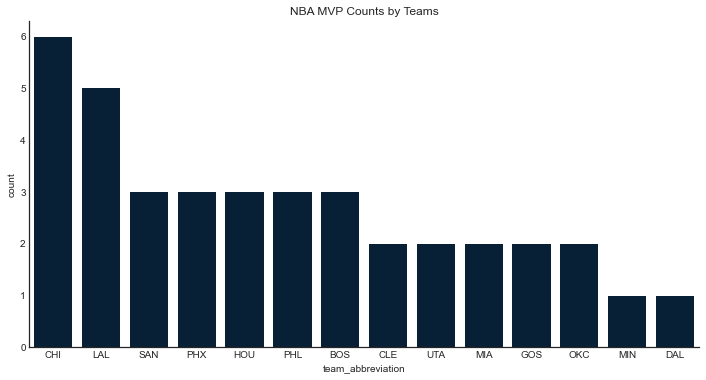

In [62]:
fig, ax = plt.subplots(figsize = (12,6))

sns.countplot('team_abbreviation', data=nba_mvps, color='#00203D', order= nba_mvps.team_abbreviation.value_counts().index);
ax.set(title = 'NBA MVP Counts by Teams')
sns.despine()

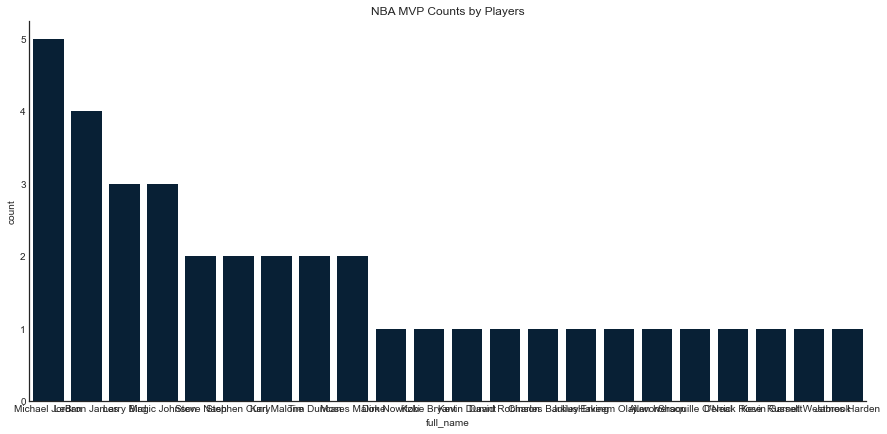

In [63]:
fig, ax = plt.subplots(figsize = (15,7))

sns.countplot('full_name', data=nba_mvps, color='#00203D', order= nba_mvps.full_name.value_counts().index);
ax.set(title = 'NBA MVP Counts by Players')
sns.despine()

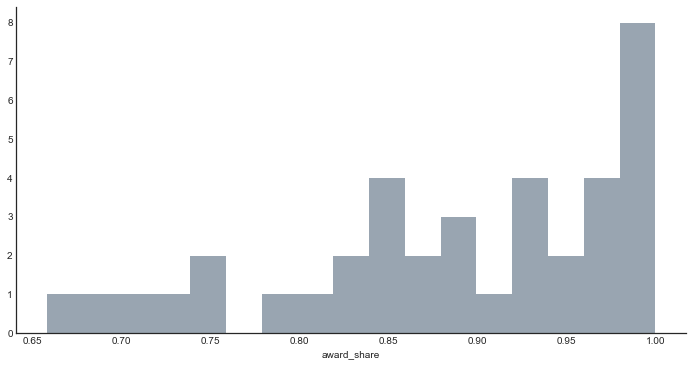

In [64]:
fig, ax = plt.subplots(figsize = (12,6))

sns.distplot(nba_mvps.award_share, color='#00203D', kde = False, bins=17)
sns.despine()

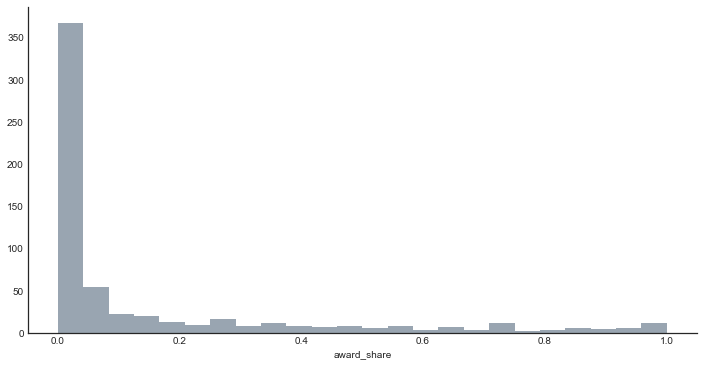

In [65]:
fig, ax = plt.subplots(figsize = (12,6))

sns.distplot(nba.award_share, color='#00203D', kde = False)
sns.despine()

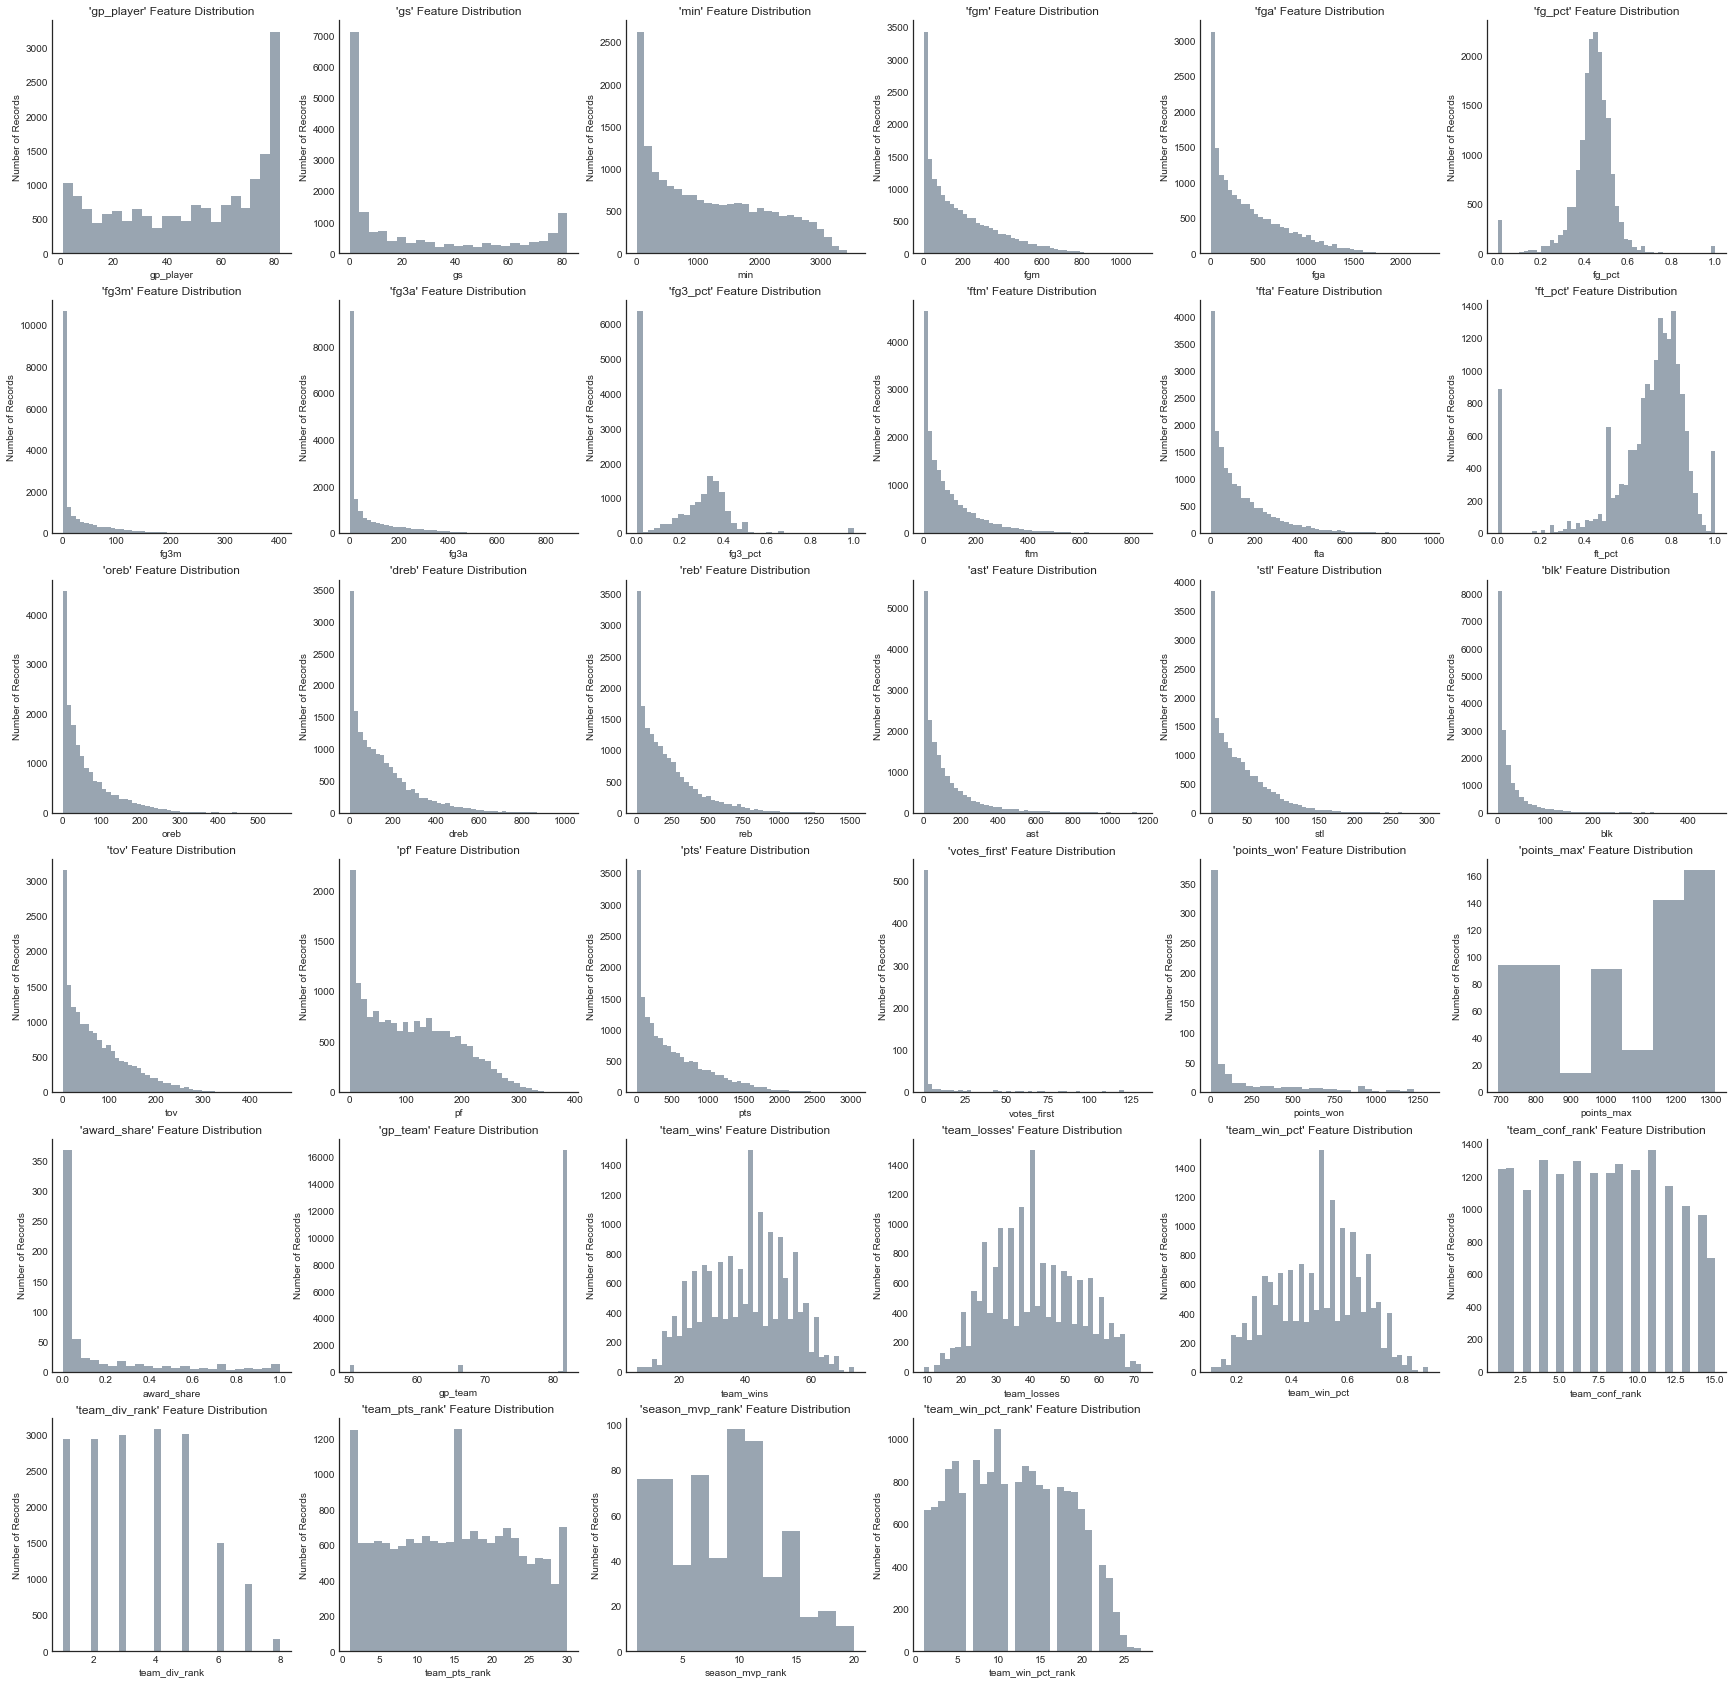

In [66]:
fig= plt.figure(figsize = (30,30))

# Loop through features identified as skewed and add each plot to subplot
for i, feature in enumerate(nba.select_dtypes(exclude='O').iloc[:,1:].columns):
    try:
        axes = fig.add_subplot(6,6,i+1)
        sns.distplot(nba[feature], ax = axes, kde = False, color='#00203D')
        sns.despine()
        props = {'title': "'%s' Feature Distribution"%(feature),
                'xlabel': f'{feature}',
                'ylabel': "Number of Records"}
        axes.set(**props)
    except ValueError:
        break

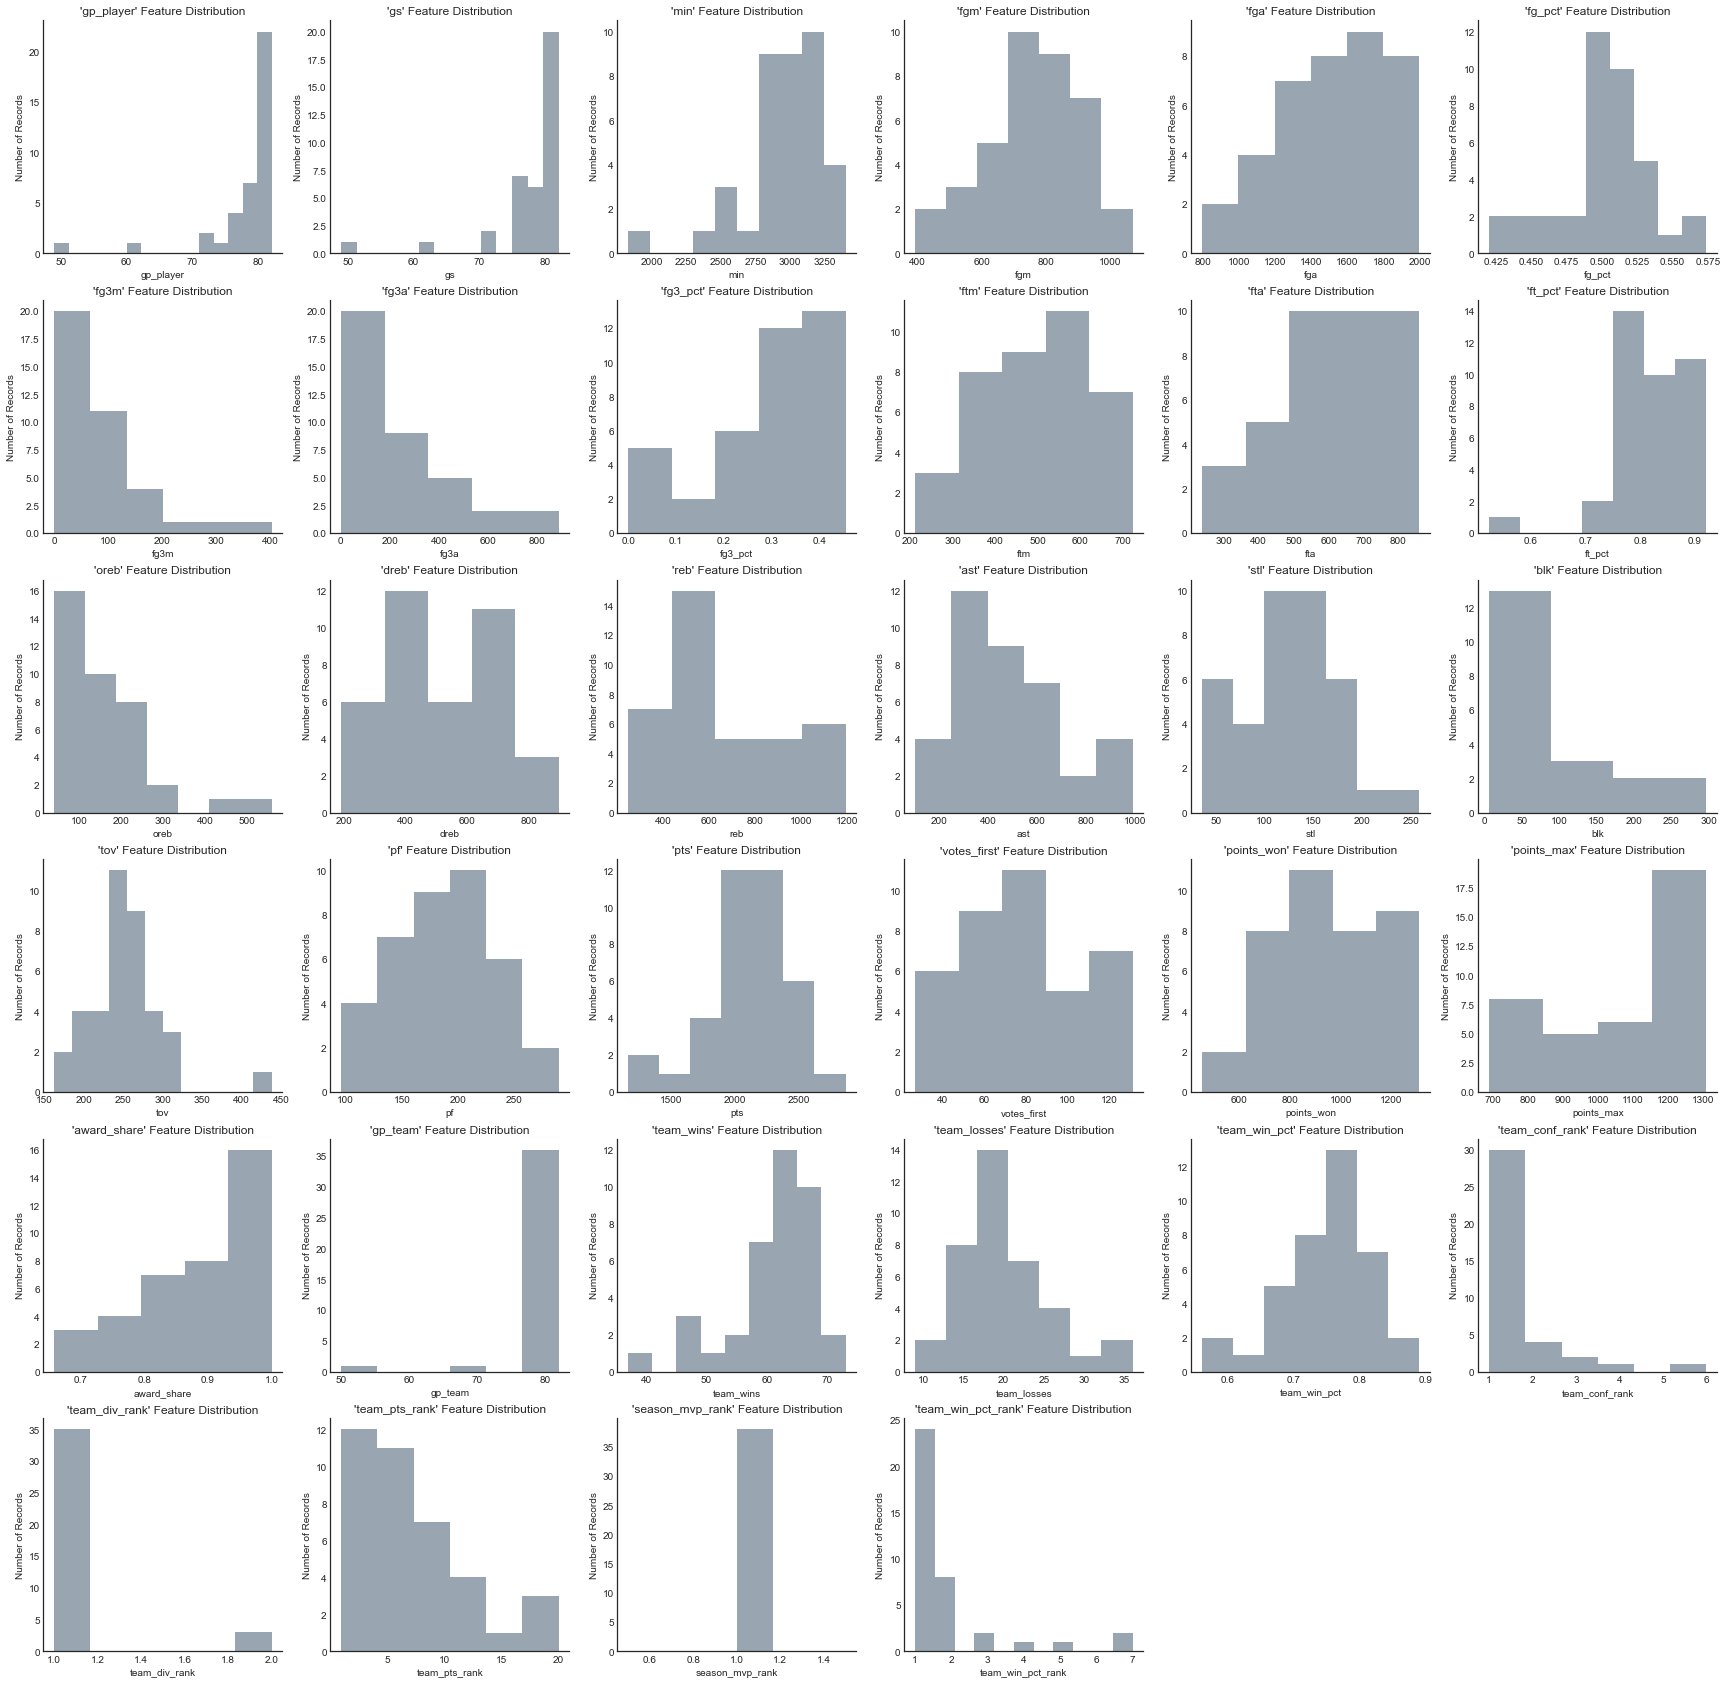

In [67]:
fig= plt.figure(figsize = (30,30))

# Loop through features identified as skewed and add each plot to subplot
for i, feature in enumerate(nba.select_dtypes(exclude='O').iloc[:,1:].columns):
    try:
        axes = fig.add_subplot(6,6,i+1)
        sns.distplot(nba_mvps[feature], ax = axes, kde = False, color='#00203D')
        sns.despine()
        props = {'title': "'%s' Feature Distribution"%(feature),
                'xlabel': f'{feature}',
                'ylabel': "Number of Records"}
        axes.set(**props)
    except ValueError:
        break

In [68]:
received_votes = nba.award_share > 0

nba.loc[received_votes].describe()

,gp_player,gs,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,award_share,gp_team,team_wins,team_losses,team_win_pct,team_conf_rank,team_div_rank,team_pts_rank,season_mvp_rank,team_win_pct_rank
count,630.000000,613.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,625.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,75.096825,73.450245,2734.32381,611.849206,1240.206349,0.494954,52.011111,147.071429,0.257499,375.857143,...,0.156727,80.601587,50.949206,29.652381,0.631867,3.901587,2.092063,10.068254,8.523810,5.819048
std,9.254835,12.068956,428.16476,166.710933,336.458794,0.044795,64.680441,167.407549,0.153544,141.529321,...,0.257821,6.058669,9.631227,8.988322,0.108021,2.723010,1.288731,7.350856,4.645312,4.108499
min,17.000000,4.000000,668.00000,137.000000,240.000000,0.384000,0.000000,0.000000,0.000000,53.000000,...,0.001000,50.000000,18.000000,9.000000,0.220000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,73.000000,71.000000,2534.25000,504.000000,1003.500000,0.463000,1.000000,9.250000,0.167000,278.000000,...,0.004000,82.000000,45.000000,24.000000,0.561000,2.000000,1.000000,4.000000,5.000000,3.000000
50%,79.000000,78.000000,2833.50000,624.500000,1268.000000,0.493000,19.000000,68.500000,0.300000,363.000000,...,0.021000,82.000000,53.000000,28.000000,0.646000,3.000000,2.000000,8.000000,9.000000,5.000000
75%,81.000000,81.000000,3030.75000,726.500000,1482.000000,0.523000,90.750000,258.750000,0.365000,468.750000,...,0.186000,82.000000,57.000000,35.000000,0.707000,5.000000,3.000000,16.000000,12.000000,8.000000
max,82.000000,82.000000,3533.00000,1098.000000,2279.000000,0.670000,402.000000,886.000000,1.000000,833.000000,...,1.000000,82.000000,73.000000,64.000000,0.890000,15.000000,7.000000,30.000000,20.000000,21.000000


## Bivariate and Multivariate Analysis

In [69]:
nba.loc[nba.description == 'NBA Most Valuable Player', 'mvp'] = 1
nba.loc[nba.description != 'NBA Most Valuable Player', 'mvp'] = 0

In [70]:
nba.mvp = nba.mvp.astype('bool')

In [71]:
nba.head()

,player_id,full_name,first_name,last_name,is_active,season_id,team_id,team_abbreviation,gp_player,gs,...,gp_team,team_wins,team_losses,team_win_pct,team_conf_rank,team_div_rank,team_pts_rank,season_mvp_rank,team_win_pct_rank,mvp
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,1610612757,POR,43,0.0,...,82,63,19,0.768,1,1,3,NaN,1.0,False
1,76017,Danny Ainge,Danny,Ainge,False,1990-91,1610612757,POR,80,0.0,...,82,63,19,0.768,1,1,3,NaN,1.0,False
2,95,Mark Bryant,Mark,Bryant,False,1990-91,1610612757,POR,53,0.0,...,82,63,19,0.768,1,1,3,NaN,1.0,False
3,76441,Wayne Cooper,Wayne,Cooper,False,1990-91,1610612757,POR,67,1.0,...,82,63,19,0.768,1,1,3,NaN,1.0,False
4,1453,Walter Davis,Walter,Davis,False,1990-91,1610612757,POR,32,1.0,...,82,63,19,0.768,1,1,3,NaN,1.0,False


In [72]:
correlation_columns = ['gp_player', 'gs', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a',
       'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'gp_team', 'team_wins', 'team_losses', 'team_win_pct',
       'team_conf_rank', 'team_div_rank', 'team_pts_rank','team_win_pct_rank', 'mvp']

In [73]:
corrmat = nba[correlation_columns].corr()

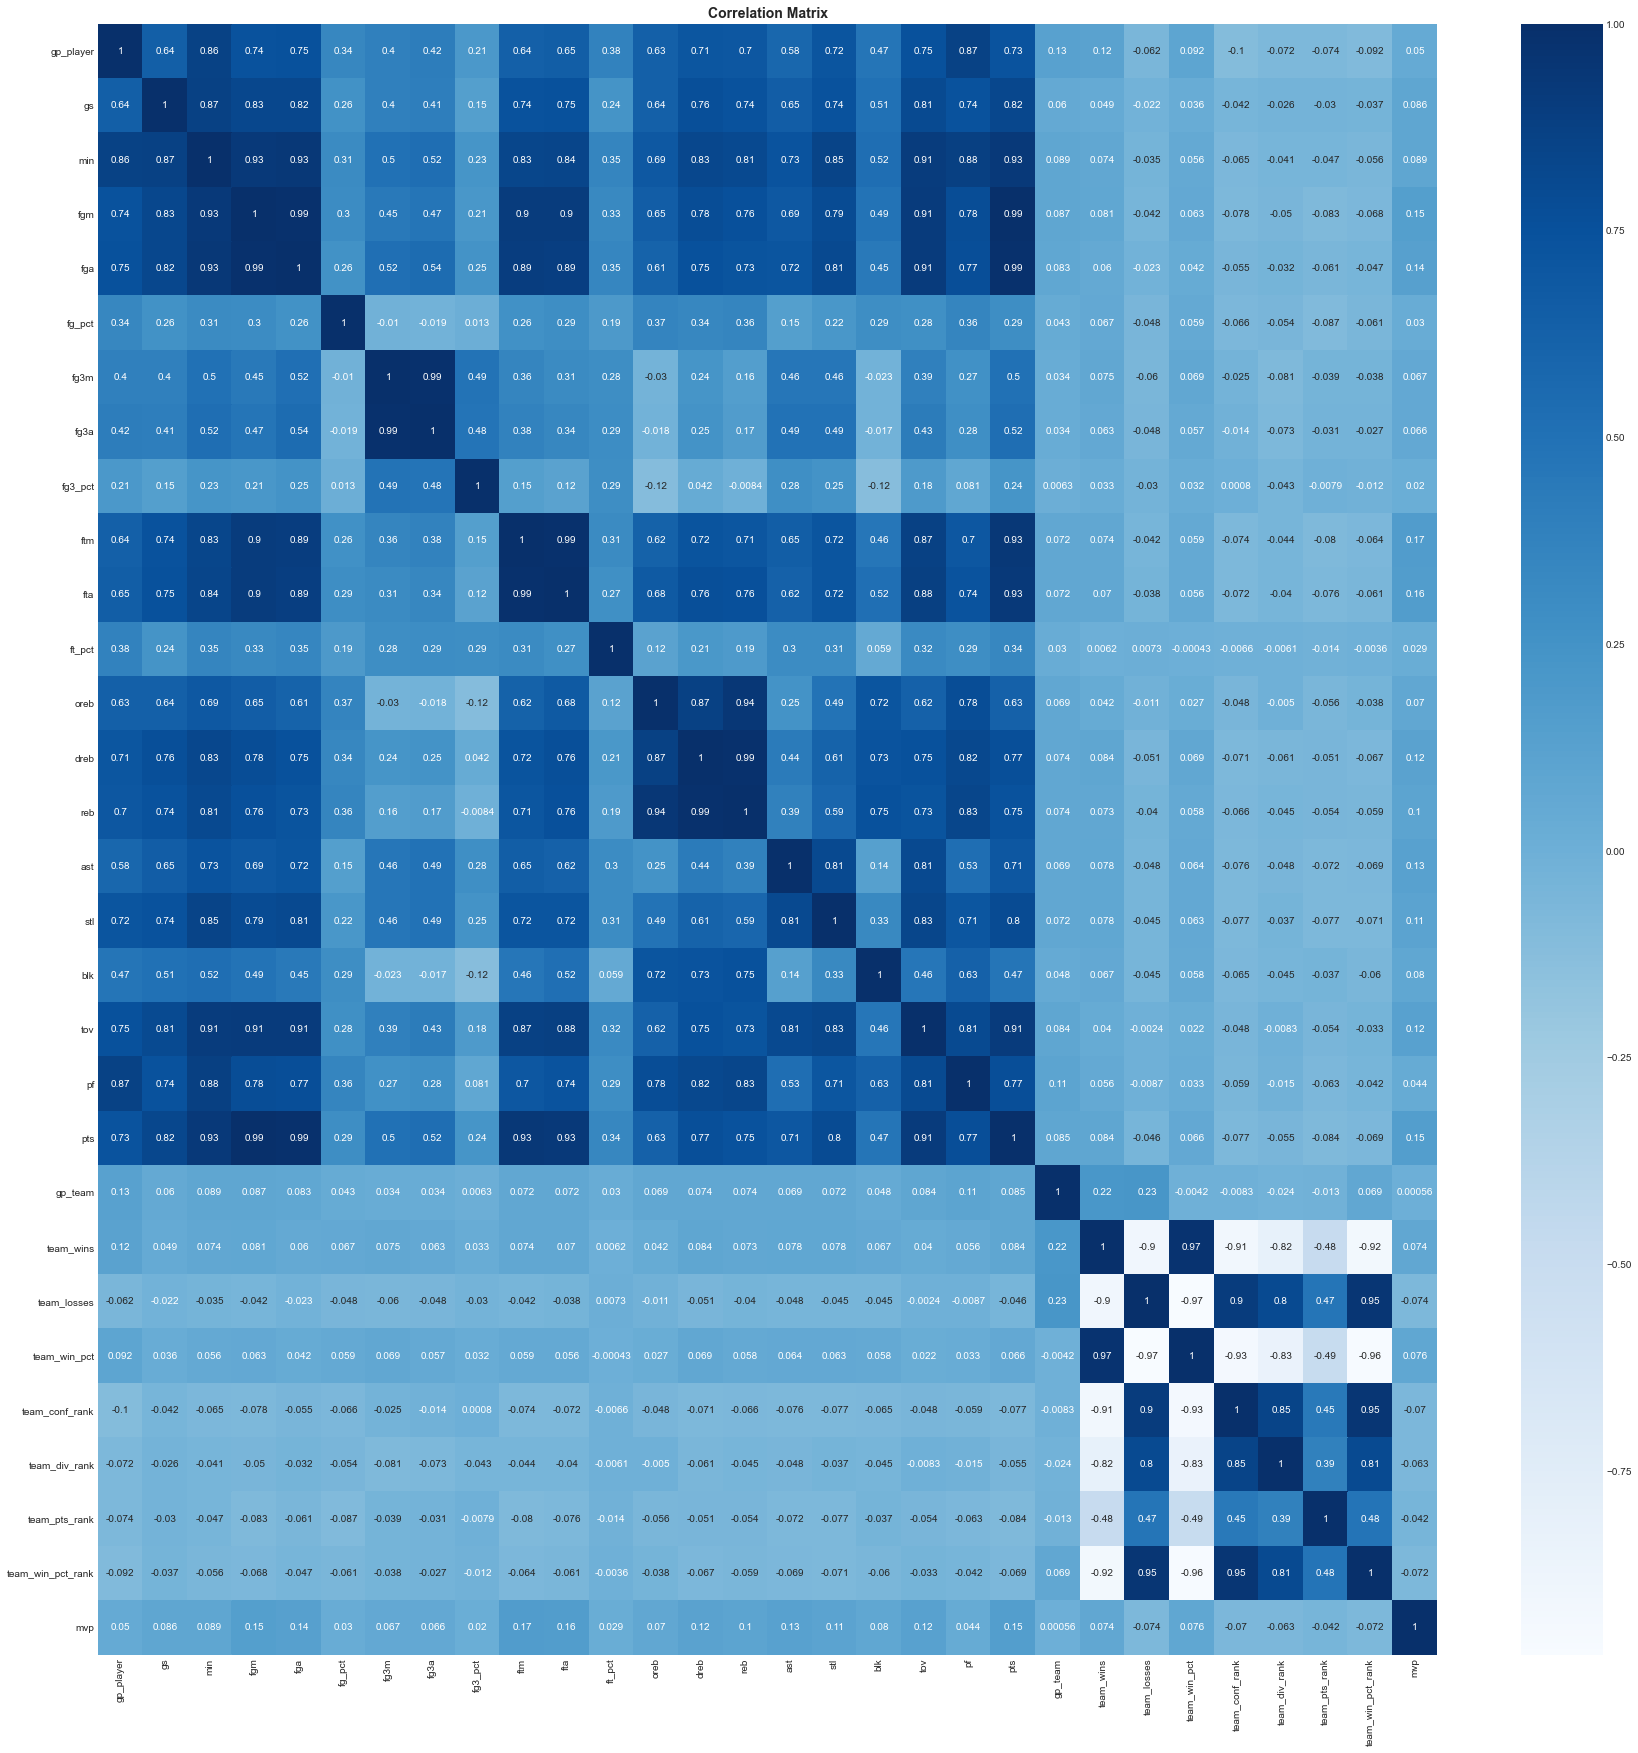

In [74]:
top_corr_features = corrmat.index
fig = plt.figure(figsize=(30,30))
axes = fig.add_subplot(1,1,1)
sns.heatmap(nba[top_corr_features].corr(),annot=True,cmap="Blues");
axes.set_title('Correlation Matrix', fontsize = 14, weight = 'bold');

In [75]:
corrmat['mvp'].sort_values(ascending=False)

mvp                  1.000000
ftm                  0.172905
fta                  0.164443
pts                  0.154702
fgm                  0.146430
fga                  0.135632
ast                  0.126345
tov                  0.124261
dreb                 0.115823
stl                  0.106757
reb                  0.104179
min                  0.089259
gs                   0.085753
blk                  0.080027
team_win_pct         0.076090
team_wins            0.074388
oreb                 0.069741
fg3m                 0.067439
fg3a                 0.066029
gp_player            0.049672
pf                   0.043974
fg_pct               0.029547
ft_pct               0.028644
fg3_pct              0.020382
gp_team              0.000558
team_pts_rank       -0.042421
team_div_rank       -0.063148
team_conf_rank      -0.069935
team_win_pct_rank   -0.071889
team_losses         -0.073947
Name: mvp, dtype: float64

In [76]:
corrmat = nba.loc[received_votes][correlation_columns].corr()

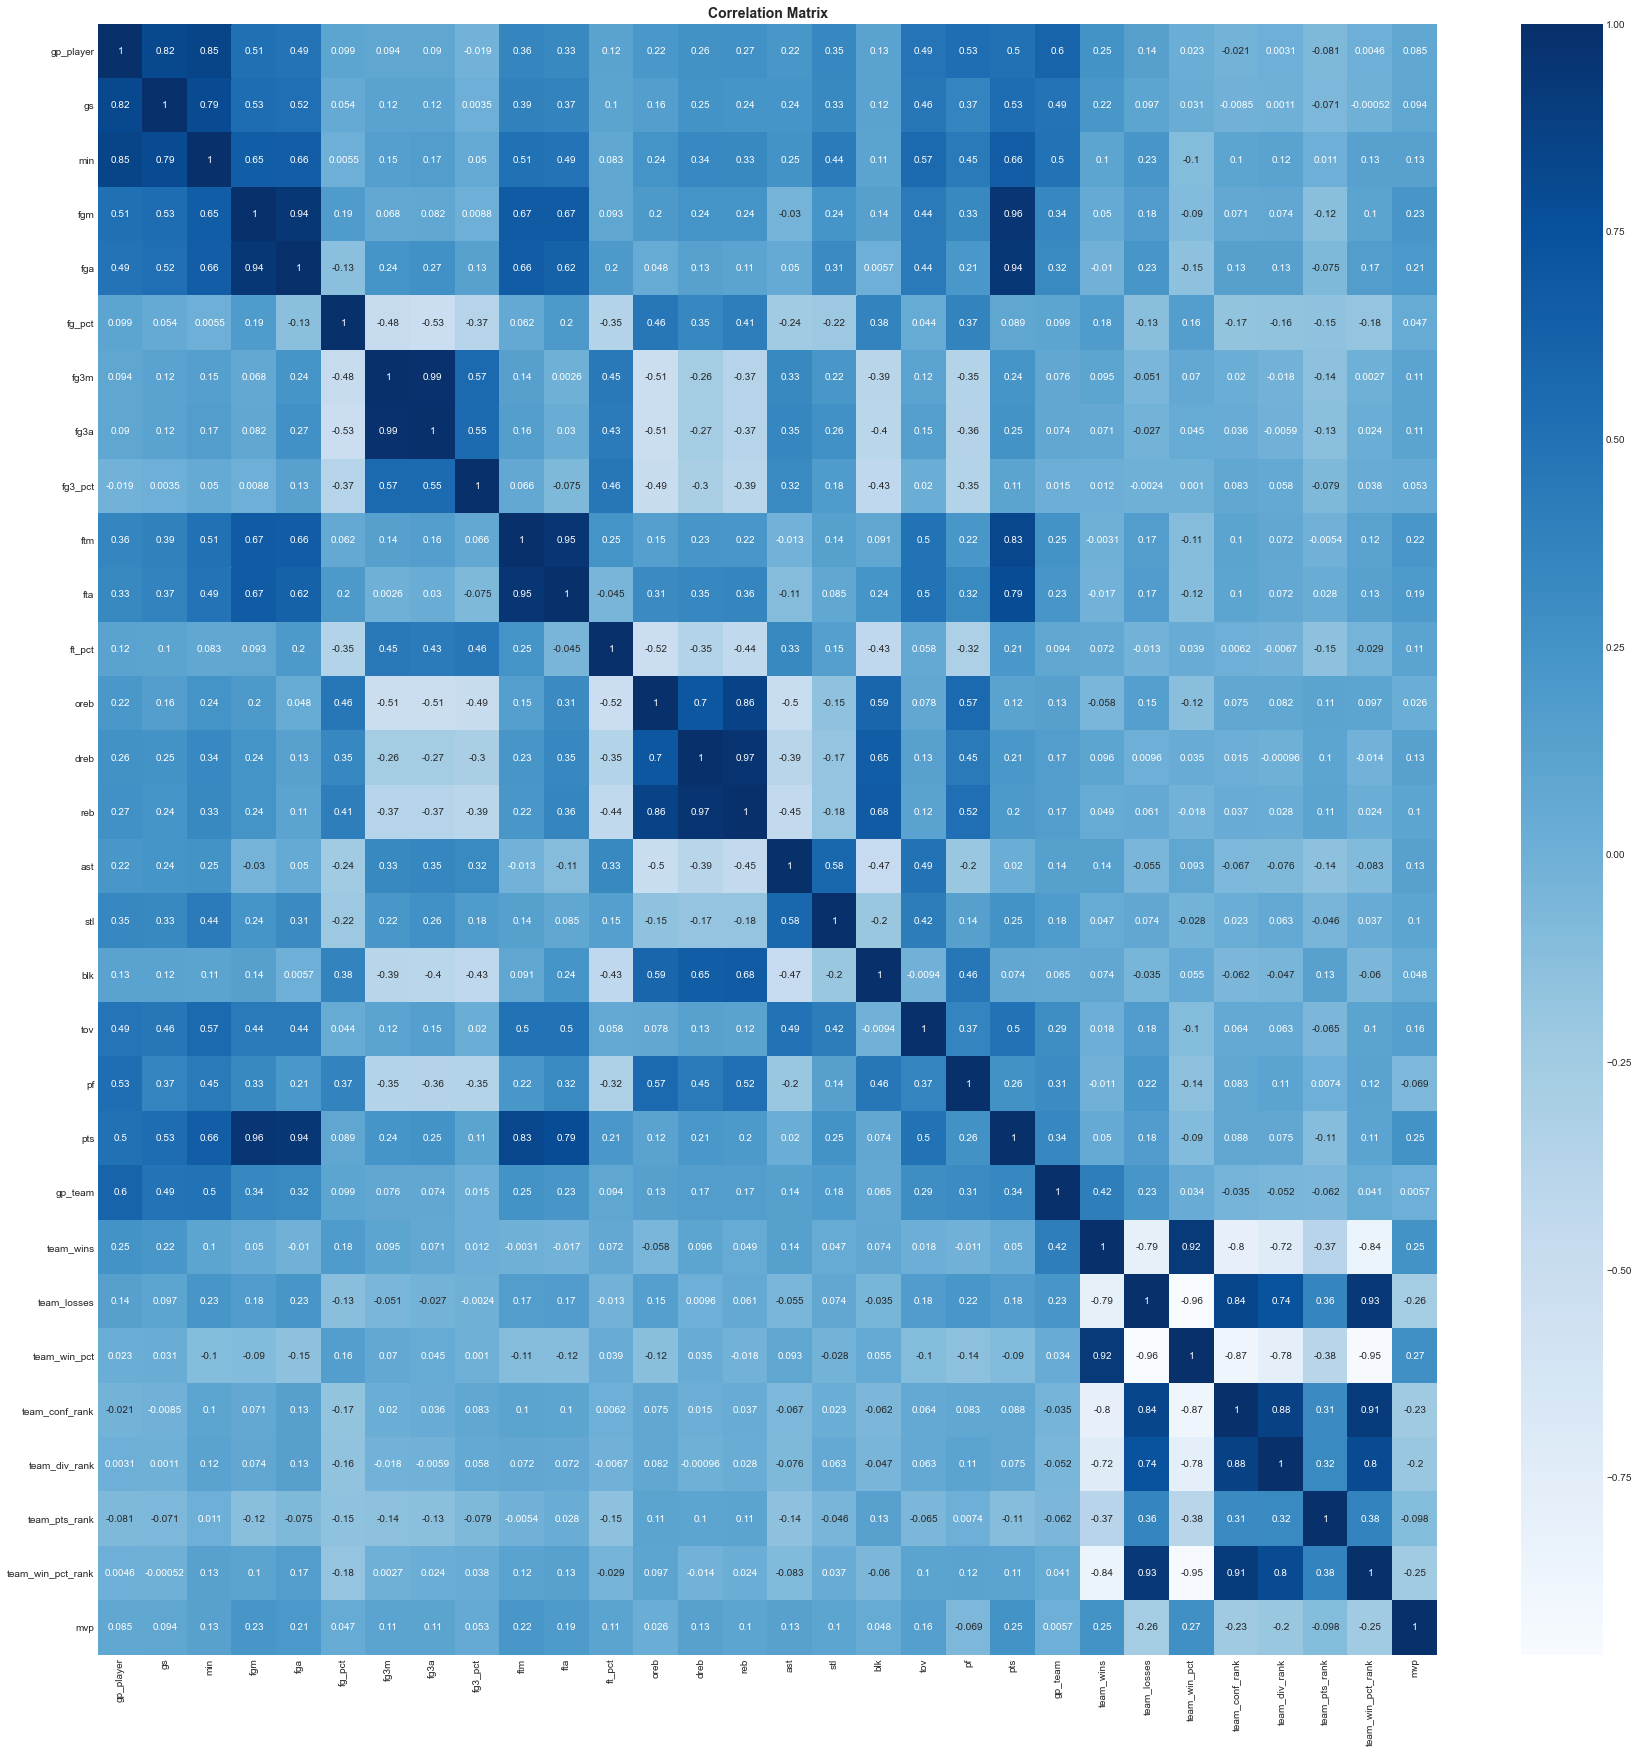

In [77]:
top_corr_features = corrmat.index
fig = plt.figure(figsize=(30,30))
axes = fig.add_subplot(1,1,1)
sns.heatmap(nba.loc[received_votes][top_corr_features].corr(),annot=True,cmap="Blues");
axes.set_title('Correlation Matrix', fontsize = 14, weight = 'bold');

In [78]:
corrmat = nba.loc[received_votes][correlation_columns].corr()

In [79]:
corrmat['mvp'].sort_values(ascending=False)

mvp                  1.000000
team_win_pct         0.272599
pts                  0.254083
team_wins            0.249361
fgm                  0.229411
ftm                  0.218448
fga                  0.209069
fta                  0.187634
tov                  0.155186
min                  0.130528
dreb                 0.128054
ast                  0.127431
fg3m                 0.114982
ft_pct               0.112115
fg3a                 0.105994
reb                  0.101245
stl                  0.100055
gs                   0.094487
gp_player            0.085307
fg3_pct              0.052939
blk                  0.047592
fg_pct               0.047331
oreb                 0.025911
gp_team              0.005660
pf                  -0.068906
team_pts_rank       -0.097665
team_div_rank       -0.199330
team_conf_rank      -0.230979
team_win_pct_rank   -0.247062
team_losses         -0.263382
Name: mvp, dtype: float64

In [80]:
nba_mvps = nba.query('description == "NBA Most Valuable Player"')

In [81]:
nba_mvps.head()

,player_id,full_name,first_name,last_name,is_active,season_id,team_id,team_abbreviation,gp_player,gs,...,gp_team,team_wins,team_losses,team_win_pct,team_conf_rank,team_div_rank,team_pts_rank,season_mvp_rank,team_win_pct_rank,mvp
204,77142,Magic Johnson,Magic,Johnson,False,1986-87,1610612747,LAL,80,80.0,...,82,65,17,0.793,1,1,2,1.0,1.0,True
231,77142,Magic Johnson,Magic,Johnson,False,1988-89,1610612747,LAL,77,77.0,...,82,57,25,0.695,1,1,5,1.0,2.0,True
782,201566,Russell Westbrook,Russell,Westbrook,True,2016-17,1610612760,OKC,81,81.0,...,82,47,35,0.573,6,2,11,1.0,7.0,True
1538,201142,Kevin Durant,Kevin,Durant,True,2013-14,1610612760,OKC,81,81.0,...,82,59,23,0.720,2,1,5,1.0,2.0,True
2082,1717,Dirk Nowitzki,Dirk,Nowitzki,False,2006-07,1610612742,DAL,78,78.0,...,82,67,15,0.817,1,1,9,1.0,1.0,True


In [82]:
corrmat['mvp'].sort_values(ascending=False).index[:7]

Index(['mvp', 'team_win_pct', 'pts', 'team_wins', 'fgm', 'ftm', 'fga'], dtype='object')

In [83]:
nba_sampled = nba[correlation_columns].sample(10, axis=1)

In [84]:
nba_sampled

,fgm,fg3m,mvp,team_wins,gp_team,min,stl,ast,team_div_rank,blk
0,55,0.0,False,63,82,290.0,4.0,12,1,12.0
1,337,102.0,False,63,82,1710.0,63.0,285,1,13.0
2,99,0.0,False,63,82,781.0,15.0,27,1,12.0
3,57,0.0,False,63,82,746.0,7.0,22,1,61.0
4,87,1.0,False,63,82,439.0,18.0,41,1,0.0
...,...,...,...,...,...,...,...,...,...,...
18774,98,76.0,False,44,82,1158.0,29.0,52,2,6.0
18775,439,89.0,False,44,82,2628.0,117.0,579,2,28.0
18776,82,45.0,False,44,82,963.0,15.0,32,2,12.0
18777,0,0.0,False,44,82,5.0,0.0,0,2,0.0


In [85]:
Ipython_default = plt.rcParams.copy()

In [86]:
# Create an array with the colors you want to use
colors = ['#00203D', '#FF6700', '#3A6EA5', '#C0C0C0', '#EBEBEB']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

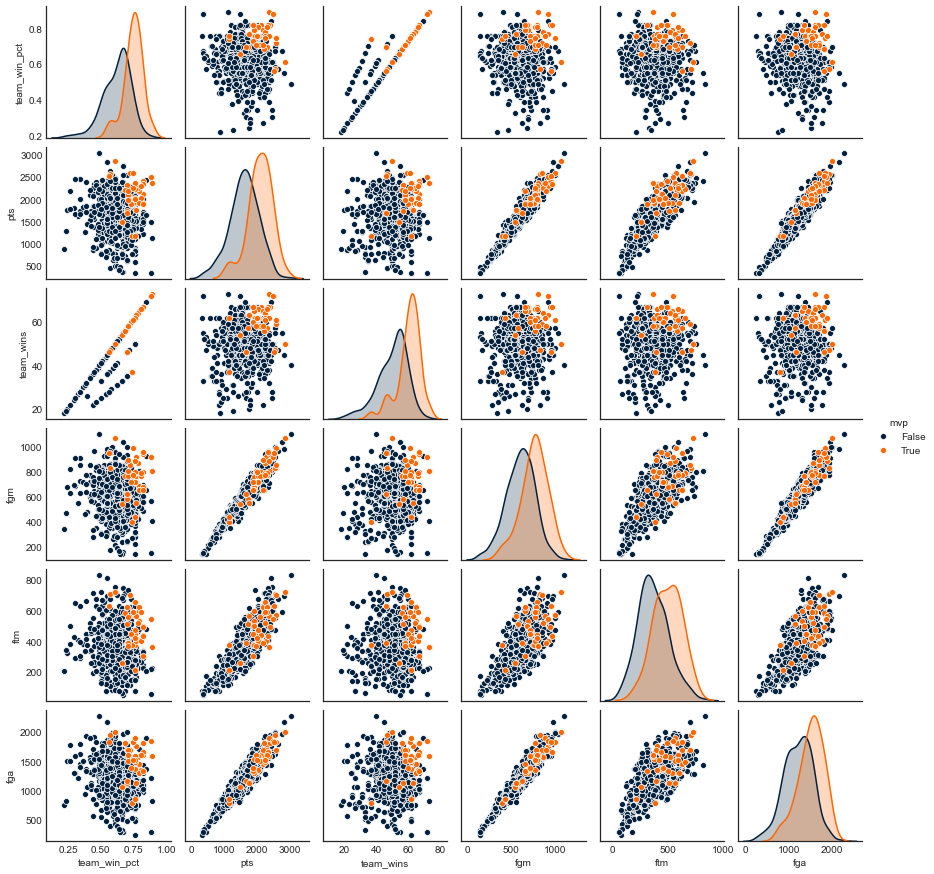

In [87]:
pairplot_columns = corrmat['mvp'].sort_values(ascending=False).index[:7]
sns.pairplot(nba.loc[received_votes][pairplot_columns], hue='mvp', height=2, kind='scatter');

In [88]:
per_game_columns = ['min','fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 
                    'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov','pts']

for column in per_game_columns:
    nba[column+'_per_game'] = nba[column]/nba['gp_player']
    #nba = nba.drop(columns = column)

EFF: efficiency: NBA's efficiency rating: (PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))

In [89]:
nba.columns

Index(['player_id', 'full_name', 'first_name', 'last_name', 'is_active',
       'season_id', 'team_id', 'team_abbreviation', 'gp_player', 'gs', 'min',
       'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta',
       'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'votes_first', 'points_won', 'points_max', 'award_share',
       'description', 'gp_team', 'team_wins', 'team_losses', 'team_win_pct',
       'team_conf_rank', 'team_div_rank', 'team_pts_rank', 'season_mvp_rank',
       'team_win_pct_rank', 'mvp', 'min_per_game', 'fgm_per_game',
       'fga_per_game', 'fg3m_per_game', 'fg3a_per_game', 'ftm_per_game',
       'fta_per_game', 'oreb_per_game', 'dreb_per_game', 'reb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pts_per_game'],
      dtype='object')

In [90]:
nba['player_efficiency'] = (nba.pts + nba.reb + nba.ast + nba.stl + nba.blk-((nba.fga-nba.fgm) + (nba.fta - nba.ftm) + nba.tov))

In [91]:
nba['true_shooting_pct'] = nba.pts/ ((2 * nba.fga + .44 + nba.fta)) * 100

In [92]:
nba.head()

,player_id,full_name,first_name,last_name,is_active,season_id,team_id,team_abbreviation,gp_player,gs,...,oreb_per_game,dreb_per_game,reb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pts_per_game,player_efficiency,true_shooting_pct
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,1610612757,POR,43,0.0,...,0.627907,1.441860,2.069767,0.279070,0.093023,0.279070,0.511628,3.139535,150.0,48.835190
1,76017,Danny Ainge,Danny,Ainge,False,1990-91,1610612757,POR,80,0.0,...,0.562500,2.000000,2.562500,3.562500,0.787500,0.162500,1.250000,11.125000,955.0,56.816731
2,95,Mark Bryant,Mark,Bryant,False,1990-91,1610612757,POR,53,0.0,...,1.226415,2.358491,3.584906,0.509434,0.283019,0.226415,0.622642,5.132075,352.0,53.602396
3,76441,Wayne Cooper,Wayne,Cooper,False,1990-91,1610612757,POR,67,1.0,...,0.805970,2.000000,2.805970,0.328358,0.104478,0.910448,0.328358,2.194030,306.0,44.218506
4,1453,Walter Davis,Walter,Davis,False,1990-91,1610612757,POR,32,1.0,...,0.593750,1.218750,1.812500,1.281250,0.562500,0.000000,0.781250,6.125000,178.0,47.407121


In [93]:
correlation_columns_per_game = ['mvp','min_per_game', 'fgm_per_game',
       'fga_per_game', 'fg3m_per_game', 'fg3a_per_game',
       'ftm_per_game', 'fta_per_game', 'oreb_per_game',
       'dreb_per_game', 'reb_per_game', 'ast_per_game', 'stl_per_game',
       'blk_per_game', 'tov_per_game', 'pts_per_game', 'player_efficiency', 'true_shooting_pct']

In [94]:
corrmat = nba.loc[received_votes][correlation_columns_per_game].corr()

In [95]:
corrmat['mvp'].sort_values(ascending=False)

mvp                  1.000000
player_efficiency    0.313839
pts_per_game         0.241533
fgm_per_game         0.213035
ftm_per_game         0.201984
fga_per_game         0.186343
fta_per_game         0.165309
true_shooting_pct    0.146894
tov_per_game         0.132406
min_per_game         0.117076
ast_per_game         0.111082
fg3m_per_game        0.104613
dreb_per_game        0.104379
fg3a_per_game        0.094466
stl_per_game         0.079602
reb_per_game         0.076996
blk_per_game         0.031568
oreb_per_game        0.006060
Name: mvp, dtype: float64

In [96]:
correlation_columns_per_game = ['award_share','min_per_game', 'fgm_per_game',
       'fga_per_game', 'fg3m_per_game', 'fg3a_per_game',
       'ftm_per_game', 'fta_per_game', 'oreb_per_game',
       'dreb_per_game', 'reb_per_game', 'ast_per_game', 'stl_per_game',
       'blk_per_game', 'tov_per_game', 'pts_per_game', 'player_efficiency', 'true_shooting_pct','mvp']

In [97]:
corrmat = nba.loc[received_votes][correlation_columns_per_game].corr()

In [106]:
corrmat['award_share'].sort_values(ascending=False).drop('mvp')

award_share          1.000000
player_efficiency    0.527100
pts_per_game         0.430702
fgm_per_game         0.390308
ftm_per_game         0.365087
fta_per_game         0.356977
fga_per_game         0.323968
min_per_game         0.241080
true_shooting_pct    0.239697
tov_per_game         0.236352
dreb_per_game        0.226503
reb_per_game         0.180079
blk_per_game         0.137574
stl_per_game         0.135082
fg3m_per_game        0.129665
fg3a_per_game        0.127583
ast_per_game         0.126159
oreb_per_game        0.049207
Name: award_share, dtype: float64

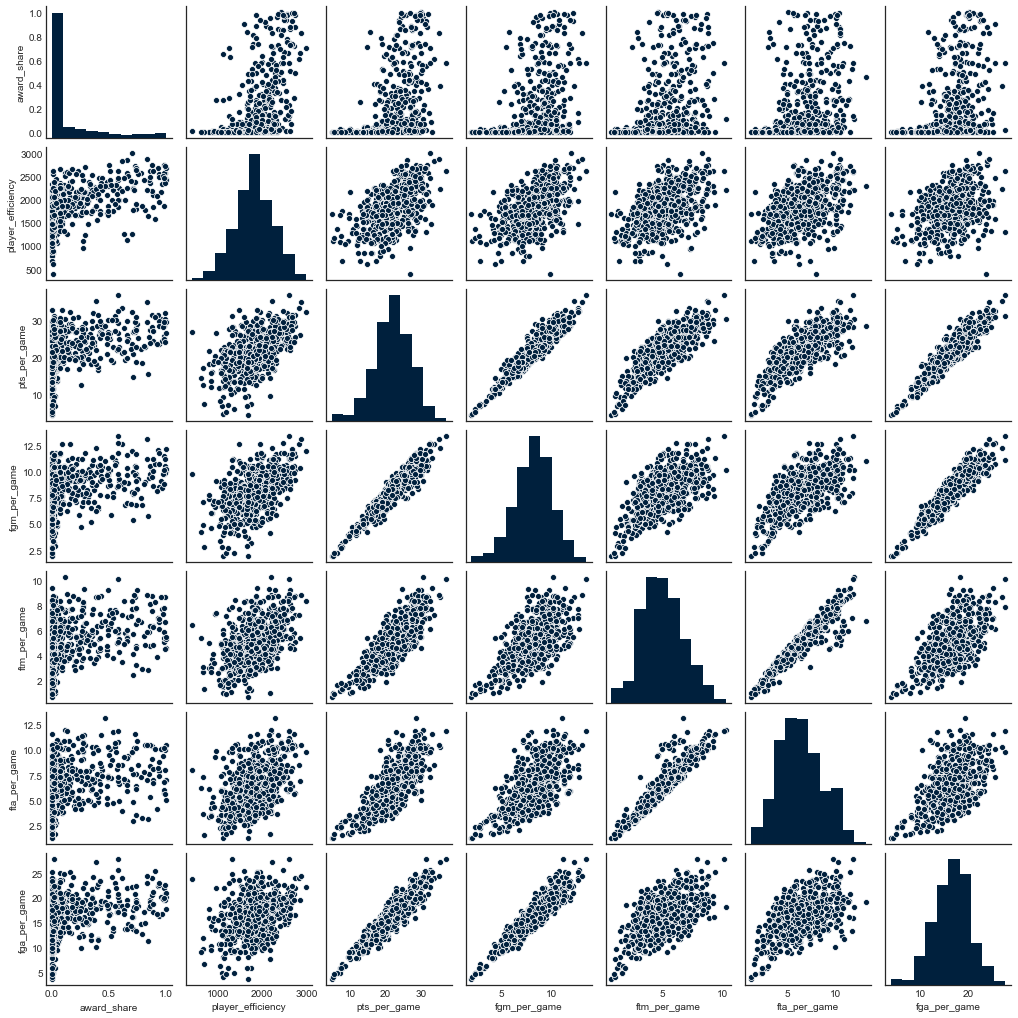

In [107]:
pairplot_columns = corrmat['award_share'].sort_values(ascending=False).drop('mvp').index[:7]
sns.pairplot(nba.loc[received_votes][pairplot_columns], height=2, kind='scatter');

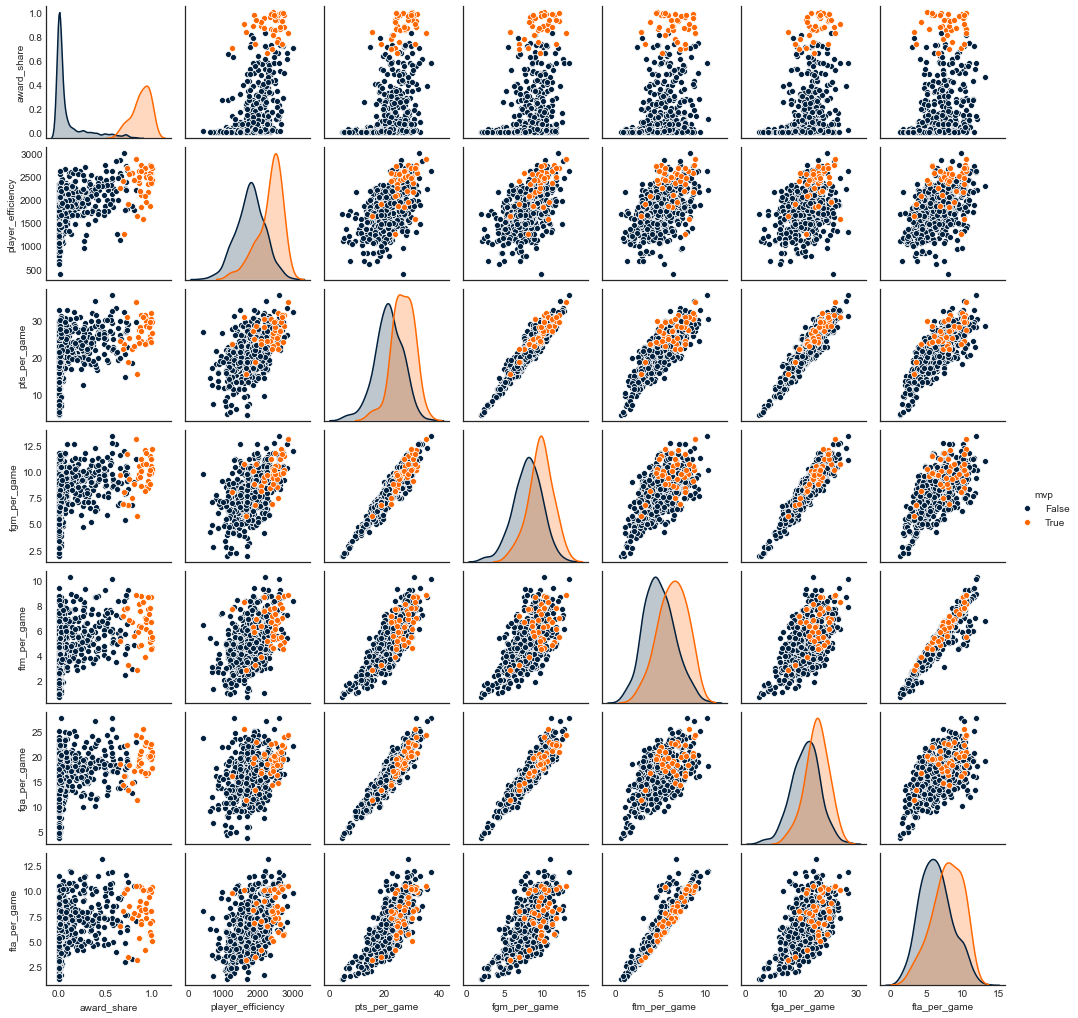

In [108]:
pairplot_columns = corrmat['mvp'].sort_values(ascending=False).index[:8]
sns.pairplot(nba.loc[received_votes][pairplot_columns], hue='mvp', height=2, kind='scatter');

# Data Prep
* ToDo: Chop off all players who are part of a team that has a rank lower than the lowest historical team win percentage rank of anyone who has recieved votes
* ToDo: Fill NaN values in the numerical columns with zeroes
* ToDo: Get per Game stats!
* ToDo: Chop off players who have not recevied votes

In [109]:
nba.columns

Index(['player_id', 'full_name', 'first_name', 'last_name', 'is_active',
       'season_id', 'team_id', 'team_abbreviation', 'gp_player', 'gs', 'min',
       'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta',
       'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'votes_first', 'points_won', 'points_max', 'award_share',
       'description', 'gp_team', 'team_wins', 'team_losses', 'team_win_pct',
       'team_conf_rank', 'team_div_rank', 'team_pts_rank', 'season_mvp_rank',
       'team_win_pct_rank', 'mvp', 'min_per_game', 'fgm_per_game',
       'fga_per_game', 'fg3m_per_game', 'fg3a_per_game', 'ftm_per_game',
       'fta_per_game', 'oreb_per_game', 'dreb_per_game', 'reb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pts_per_game', 'player_efficiency', 'true_shooting_pct'],
      dtype='object')

In [110]:
eligible_teams = nba.loc[received_votes].describe()['team_win_pct_rank']['max']
nba_trimmed = nba.loc[nba['team_win_pct_rank'] <= eligible_teams]

In [111]:
nba_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16526 entries, 0 to 18778
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          16526 non-null  object 
 1   full_name          16526 non-null  object 
 2   first_name         16494 non-null  object 
 3   last_name          16526 non-null  object 
 4   is_active          16526 non-null  bool   
 5   season_id          16526 non-null  object 
 6   team_id            16526 non-null  object 
 7   team_abbreviation  16526 non-null  object 
 8   gp_player          16526 non-null  int64  
 9   gs                 16269 non-null  float64
 10  min                16526 non-null  float64
 11  fgm                16526 non-null  int64  
 12  fga                16526 non-null  int64  
 13  fg_pct             16525 non-null  float64
 14  fg3m               16526 non-null  float64
 15  fg3a               16526 non-null  float64
 16  fg3_pct            163

In [112]:
# nba_trimmed = nba_trimmed.loc[received_votes]

In [113]:
nba_trimmed_labels = nba_trimmed['award_share'].fillna(0).copy()

In [114]:
nba_trimmed = nba_trimmed.drop('award_share', axis=1)

In [115]:
nba_trimmed

,player_id,full_name,first_name,last_name,is_active,season_id,team_id,team_abbreviation,gp_player,gs,...,oreb_per_game,dreb_per_game,reb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pts_per_game,player_efficiency,true_shooting_pct
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False,1990-91,1610612757,POR,43,0.0,...,0.627907,1.441860,2.069767,0.279070,0.093023,0.279070,0.511628,3.139535,150.0,48.835190
1,76017,Danny Ainge,Danny,Ainge,False,1990-91,1610612757,POR,80,0.0,...,0.562500,2.000000,2.562500,3.562500,0.787500,0.162500,1.250000,11.125000,955.0,56.816731
2,95,Mark Bryant,Mark,Bryant,False,1990-91,1610612757,POR,53,0.0,...,1.226415,2.358491,3.584906,0.509434,0.283019,0.226415,0.622642,5.132075,352.0,53.602396
3,76441,Wayne Cooper,Wayne,Cooper,False,1990-91,1610612757,POR,67,1.0,...,0.805970,2.000000,2.805970,0.328358,0.104478,0.910448,0.328358,2.194030,306.0,44.218506
4,1453,Walter Davis,Walter,Davis,False,1990-91,1610612757,POR,32,1.0,...,0.593750,1.218750,1.812500,1.281250,0.562500,0.000000,0.781250,6.125000,178.0,47.407121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18774,2052,DeShawn Stevenson,DeShawn,Stevenson,False,2012-13,1610612737,ATL,56,31.0,...,0.321429,1.857143,2.178571,0.928571,0.517857,0.107143,0.410714,5.071429,295.0,51.877831
18775,201952,Jeff Teague,Jeff,Teague,True,2012-13,1610612737,ATL,80,78.0,...,0.312500,1.937500,2.250000,7.237500,1.462500,0.350000,2.875000,14.575000,1278.0,53.623002
18776,201229,Anthony Tolliver,Anthony,Tolliver,True,2012-13,1610612737,ATL,62,11.0,...,0.500000,2.000000,2.500000,0.516129,0.241935,0.193548,0.580645,4.080645,290.0,52.333278
18777,202719,Jeremy Tyler,Jeremy,Tyler,False,2012-13,1610612737,ATL,1,0.0,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000


In [116]:
nba_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16526 entries, 0 to 18778
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          16526 non-null  object 
 1   full_name          16526 non-null  object 
 2   first_name         16494 non-null  object 
 3   last_name          16526 non-null  object 
 4   is_active          16526 non-null  bool   
 5   season_id          16526 non-null  object 
 6   team_id            16526 non-null  object 
 7   team_abbreviation  16526 non-null  object 
 8   gp_player          16526 non-null  int64  
 9   gs                 16269 non-null  float64
 10  min                16526 non-null  float64
 11  fgm                16526 non-null  int64  
 12  fga                16526 non-null  int64  
 13  fg_pct             16525 non-null  float64
 14  fg3m               16526 non-null  float64
 15  fg3a               16526 non-null  float64
 16  fg3_pct            163

In [117]:
nba_trimmed.columns

Index(['player_id', 'full_name', 'first_name', 'last_name', 'is_active',
       'season_id', 'team_id', 'team_abbreviation', 'gp_player', 'gs', 'min',
       'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta',
       'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'votes_first', 'points_won', 'points_max', 'description',
       'gp_team', 'team_wins', 'team_losses', 'team_win_pct', 'team_conf_rank',
       'team_div_rank', 'team_pts_rank', 'season_mvp_rank',
       'team_win_pct_rank', 'mvp', 'min_per_game', 'fgm_per_game',
       'fga_per_game', 'fg3m_per_game', 'fg3a_per_game', 'ftm_per_game',
       'fta_per_game', 'oreb_per_game', 'dreb_per_game', 'reb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pts_per_game', 'player_efficiency', 'true_shooting_pct'],
      dtype='object')

Columns that don't have any predictive power: 
- 'player_id', 
- 'full_name', 
- 'first_name', 
- 'last_name', 
- 'is_active',
- 'season_id', 
- 'team_id', 
- 'team_abbreviation'

In [118]:
select_columns = list(nba_trimmed.iloc[:, np.r_[8,13,16,19,36:40,41,50:len(nba_trimmed.columns)]].columns)

In [119]:
select_columns

['gp_player',
 'fg_pct',
 'fg3_pct',
 'ft_pct',
 'team_win_pct',
 'team_conf_rank',
 'team_div_rank',
 'team_pts_rank',
 'team_win_pct_rank',
 'oreb_per_game',
 'dreb_per_game',
 'reb_per_game',
 'ast_per_game',
 'stl_per_game',
 'blk_per_game',
 'tov_per_game',
 'pts_per_game',
 'player_efficiency',
 'true_shooting_pct']

In [120]:
nba_trimmed[select_columns] = nba_trimmed[select_columns].fillna(0).copy()

In [121]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, SelectFromModel

In [122]:
# Instantiate SelectKBest
select_best = SelectKBest(k=10, score_func=f_regression)

best_features = select_best.fit(nba_trimmed[select_columns], nba_trimmed_labels)
indices = best_features.get_support(indices=True)
colnames_selected = [nba_trimmed[select_columns].columns[i] for i in indices]

# Select the most important columns 
#nba_trimmed = nba_trimmed[colnames_selected]

print(colnames_selected)

['team_win_pct', 'team_win_pct_rank', 'dreb_per_game', 'reb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pts_per_game', 'player_efficiency']


In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=200), max_features=10)
embeded_rf_selector.fit(nba_trimmed[select_columns], nba_trimmed_labels)

embeded_rf_indices = embeded_rf_selector.get_support(indices = True)
embeded_rf_colnames_selected = [nba_trimmed[select_columns].columns[i] for i in embeded_rf_indices]
print(embeded_rf_colnames_selected)

['team_win_pct', 'team_win_pct_rank', 'pts_per_game', 'player_efficiency']


In [125]:
seasons = nba_trimmed.season_id.unique()

In [126]:
seasons

array(['1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1980-81',
       '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87',
       '1987-88', '1988-89', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2016-17', '2017-18', '2008-09',
       '1989-90', '2012-13', '2013-14', '2015-16', '2014-15', '2010-11',
       '2011-12', '2009-10'], dtype=object)

In [1357]:
data = nba_trimmed[nba_trimmed.season_id == '1990-91']
data_indices = data.index
data_labels = nba_trimmed_labels.loc[data_indices]


scores = cross_val_score(lin_reg, data[colnames_selected], data_labels
                         ,scoring="neg_mean_squared_error"
                         , cv=kfold)
lin_rmse_scores = np.sqrt(-scores)

In [1358]:
display_scores(lin_rmse_scores)

Scores: [0.02155252 0.01998711 0.03771936 0.16499801 0.02662755 0.02207591
 0.0250306  0.02672199 0.08849751 0.02811665]
Mean: 0.046132719286281904
Standard deviation: 0.04403195828975243


In [1361]:
from sklearn.metrics import mean_squared_error

In [1175]:
errors = []
for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    scores = cross_val_score(lin_reg, data[colnames_selected], data_labels
                         ,scoring="neg_mean_squared_error"
                         , cv=kfold)
    lin_rmse_scores = np.sqrt(-scores)
    errors.append(lin_rmse_scores.mean())
    
np.mean(errors)

In [1219]:
for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    lin_reg.fit(data[colnames_selected], data_labels)
    
    lin_predictions = lin_reg.predict(data[colnames_selected])
    lin_mse = mean_squared_error(data_labels, lin_predictions)
    lin_rmse = np.sqrt(lin_mse)
    errors.append(lin_rmse)
    
print(np.mean(errors))

0.1129670810089325


In [1227]:
errors = []
for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    forest_reg = RandomForestRegressor(n_estimators=200, random_state=42)

    forest_scores = cross_val_score(forest_reg, data[colnames_selected], data_labels
                         ,scoring="neg_mean_squared_error"
                         ,cv=kfold)
    forest_rmse_scores = np.sqrt(-forest_scores)
    errors.append(forest_rmse_scores.mean())
np.mean(errors)

0.19483974444327054

In [1228]:
errors = []
for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    forest_reg = RandomForestRegressor(n_estimators=200, random_state=42)
    
    forest_reg.fit(data[colnames_selected], data_labels)
    
    forest_predictions = forest_reg.predict(data[colnames_selected])
    forest_mse = mean_squared_error(data_labels, forest_predictions)
    forest_rmse = np.sqrt(forest_mse)
    errors.append(forest_rmse)
    
print(np.mean(errors))

0.08485394366404375


In [1202]:
errors = []
for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    bagging_reg = BaggingRegressor()

    bagging_scores = cross_val_score(bagging_reg, data[colnames_selected], data_labels
                         ,scoring="neg_mean_squared_error"
                         ,cv=kfold)
    bagging_rmse_scores = np.sqrt(-bagging_scores)
    errors.append(bagging_rmse_scores.mean())
np.mean(errors)

0.20368437296390401

In [1203]:
errors = []
for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    boost_reg = AdaBoostRegressor()

    boost_scores = cross_val_score(boost_reg, data[colnames_selected], data_labels
                         ,scoring="neg_mean_squared_error"
                         ,cv=kfold)
    boost_rmse_scores = np.sqrt(-boost_scores)
    errors.append(boost_rmse_scores.mean())
np.mean(errors)

0.19444504084198763

# Model Shortlist

In [127]:
from sklearn.model_selection import GroupKFold

from sklearn.model_selection import cross_val_score

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [133]:
errors = []

for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
        
    lin_reg.fit(data[colnames_selected], data_labels)
    
    lin_predictions = lin_reg.predict(data[colnames_selected])
    lin_mse = mean_squared_error(data_labels, lin_predictions)
    lin_rmse = np.sqrt(lin_mse)
    errors.append(lin_rmse)
    
print(np.mean(errors))

0.05342164116031942


In [134]:
grouped_kfold = GroupKFold(n_splits=10)

In [135]:
scores = cross_val_score(lin_reg, nba_trimmed[colnames_selected], nba_trimmed_labels
                         ,scoring="neg_mean_squared_error"
                         ,groups=nba_trimmed['season_id'], cv=grouped_kfold)
lin_rmse_scores = np.sqrt(-scores)

In [136]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.05495407 0.05717909 0.05618454 0.05458624 0.05452729 0.05442422
 0.05445729 0.05314578 0.05494563 0.05441868]
Mean: 0.054882282257415774
Standard deviation: 0.0010399441786436282


In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
errors = []

for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    forest_reg = RandomForestRegressor(n_estimators=200, random_state=42)
    
    forest_reg.fit(data[colnames_selected], data_labels)
    
    forest_predictions = forest_reg.predict(data[colnames_selected])
    forest_mse = mean_squared_error(data_labels, forest_predictions)
    forest_rmse = np.sqrt(forest_mse)
    errors.append(forest_rmse)
    
print(np.mean(errors))

0.017089331233027995


In [139]:
forest_reg = RandomForestRegressor(n_estimators=200)

forest_scores = cross_val_score(forest_reg, nba_trimmed[colnames_selected], nba_trimmed_labels
                         ,scoring="neg_mean_squared_error"
                         ,groups=nba_trimmed['season_id'], cv=grouped_kfold)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.02584265 0.02621976 0.03266276 0.02622273 0.04340293 0.03437612
 0.03620681 0.0395514  0.03577727 0.02572581]
Mean: 0.032598822997706126
Standard deviation: 0.006046331141356756


In [140]:
from sklearn.svm import SVR

In [ ]:
errors = []

for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    svm_reg = SVR(kernel="linear")
    
    svm_reg.fit(data[colnames_selected], data_labels)
    
    svm_predictions = svm_reg.predict(data[colnames_selected])
    svm_mse = mean_squared_error(data_labels, svm_predictions)
    svm_rmse = np.sqrt(svm_mse)
    errors.append(svm_rmse)
    
print(np.mean(errors))

In [ ]:
svm_reg = SVR(kernel="linear")
svr_scores = cross_val_score(svm_reg, nba_trimmed[colnames_selected], nba_trimmed_labels
                         ,scoring="neg_mean_squared_error"
                         ,groups=nba_trimmed['season_id'], cv=grouped_kfold)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

In [141]:
from sklearn.ensemble import BaggingRegressor

In [142]:
errors = []

for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    bagging_reg = BaggingRegressor()
    
    bagging_reg.fit(data[colnames_selected], data_labels)
    
    bagging_predictions = bagging_reg.predict(data[colnames_selected])
    bagging_mse = mean_squared_error(data_labels, bagging_predictions)
    bagging_rmse = np.sqrt(bagging_mse)
    errors.append(bagging_rmse)
    
print(np.mean(errors))

0.018482337082716956


In [143]:
bagging_reg = BaggingRegressor()

bagging_scores = cross_val_score(bagging_reg, nba_trimmed[colnames_selected], nba_trimmed_labels
                         ,scoring="neg_mean_squared_error"
                         ,groups=nba_trimmed['season_id'], cv=grouped_kfold)
bagging_rmse_scores = np.sqrt(-bagging_scores)
display_scores(bagging_rmse_scores)

Scores: [0.0286703  0.03062367 0.03460517 0.03057036 0.04776018 0.03350114
 0.03592945 0.04116892 0.03578648 0.03160225]
Mean: 0.03502179064494766
Standard deviation: 0.005432693509578582


In [144]:
from sklearn.ensemble import AdaBoostRegressor

In [145]:
errors = []

for season in seasons:
    data = nba_trimmed[nba_trimmed.season_id == season]
    data_indices = data.index
    data_labels = nba_trimmed_labels.loc[data_indices]
    
    boosting_reg = AdaBoostRegressor()
    
    boosting_reg.fit(data[colnames_selected], data_labels)
    
    boosting_predictions = boosting_reg.predict(data[colnames_selected])
    boosting_mse = mean_squared_error(data_labels, boosting_predictions)
    boosting_rmse = np.sqrt(boosting_mse)
    errors.append(boosting_rmse)
    
print(np.mean(errors))

0.004593258428725764


In [146]:
boosting_reg = AdaBoostRegressor()

boosting_scores = cross_val_score(boosting_reg, nba_trimmed[colnames_selected], nba_trimmed_labels
                         ,scoring="neg_mean_squared_error"
                         ,groups=nba_trimmed['season_id'], cv=grouped_kfold)
boosting_rmse_scores = np.sqrt(-boosting_scores)
display_scores(boosting_rmse_scores)

Scores: [0.03192783 0.05234633 0.05864882 0.06435276 0.06746318 0.05088648
 0.05780166 0.05935818 0.04879641 0.05458445]
Mean: 0.05461660966014973
Standard deviation: 0.009361820744427868


# Fine-Tuning of Model

Let's go with these models to tune :
- Linear Regressor
- Random Forest Regressor
- Bagging Regressor
- AdaBoostRegressor

In [147]:
from sklearn.model_selection import RandomizedSearchCV

In [148]:
rf_mod = RandomForestRegressor()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
            "n_estimators": list(range(10, 300)),
              "max_features": list(range(1, nba_trimmed[colnames_selected].shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False]
              }


# Run a randomized search over the hyperparameters
rf_search = RandomizedSearchCV(rf_mod, param_distributions=param_dist, cv = grouped_kfold, return_train_score=True
                              ,scoring='neg_mean_squared_error')


# Fit the model on the training data
rf_search.fit(nba_trimmed[colnames_selected], nba_trimmed_labels, groups = nba_trimmed['season_id'])

#Adjust thresholds
# threshold
# rf_predictions = np.where(rf_search.best_estimator_.predict_proba(X_test)[:,1] > threshold, 1, 0)

# Make predictions on the test data
# rf_predictions = rf_search.best_estimator_.predict(X_test)

RandomizedSearchCV(cv=GroupKFold(n_splits=10),
                   estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31

In [149]:
rf_search.best_estimator_

RandomForestRegressor(max_features=9, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=103)

In [150]:
cvres = rf_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.03991830970611284 {'n_estimators': 138, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 3, 'bootstrap': True}
0.03570954392223532 {'n_estimators': 105, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 6, 'max_depth': 3, 'bootstrap': False}
0.03445784238826602 {'n_estimators': 295, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 2, 'max_depth': None, 'bootstrap': False}
0.035028457773889625 {'n_estimators': 113, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 3, 'bootstrap': True}
0.03244690206768453 {'n_estimators': 103, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 9, 'max_depth': None, 'bootstrap': True}
0.03365467231547311 {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 2, 'max_depth': None, 'bootstrap': False}
0.035162385047912616 {'n_estimators': 205, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 8, 'max_depth': 3, 'b

In [151]:
final_model = rf_search.best_estimator_

In [152]:
def format_dataframe(X):
    id_columns = X.columns[X.columns.str.contains('id')]
    for column in id_columns:
        X[column] = X[column].astype('str')

    X = X.drop(columns = ['league_id'])
    X = X.rename(columns={'gp_x': 'gp_player', 'gp_y': 'gp_team'})

    for column in X.iloc[:,36:].columns:
        X = X.rename(columns = {column: 'team_'+column})

    X = X.copy().drop(columns = ['player_age'])

    X['season_mvp_rank'] = X.groupby(['season_id'])['award_share'].rank('dense', ascending=False)
    X['team_win_pct_rank'] = X.groupby(['season_id'])['team_win_pct'].rank('dense', ascending=False)
    
    per_game_columns = ['min','fgm', 'fga', 'fg3m', 'fg3a', 'ftm', 'fta', 
                        'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov','pts']

    for column in per_game_columns:
        X[column+'_per_game'] = X[column]/X['gp_player']

    X['player_efficiency'] = (X.pts + X.reb + X.ast + X.stl + X.blk-((X.fga-X.fgm) + (X.fta - X.ftm) + X.tov))

    X['true_shooting_pct'] = X.pts/ ((2 * X.fga + .44 + X.fta)) * 100
        
    eligible_teams = nba.loc[received_votes].describe()['team_win_pct_rank']['max']
    X_trimmed = X.loc[X['team_win_pct_rank'] <= eligible_teams]
    
    y_trimmed = X_trimmed['award_share'].fillna(0).copy()
    X_trimmed = X_trimmed.drop('award_share', axis=1)
    
    return X_trimmed, y_trimmed

In [180]:
df_test, df_labels = format_dataframe(evaluation_season)

<ipython-input-152-a342bb04a9e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype('str')


In [181]:
final_predictions = final_model.predict(df_test[colnames_selected])

In [182]:
final_predictions

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.91038384e-05, 6.20932466e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.94311877e-04, 0.00000000e+00,
       0.00000000e+00, 4.54262566e-05, 7.68530450e-03, 0.00000000e+00,
       1.07107070e-03, 0.00000000e+00, 1.63894358e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.76699029e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.19883999e-04,
       0.00000000e+00, 0.00000000e+00, 5.36684728e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [183]:
ind = np.argpartition(final_predictions, -5)[-5:]

In [184]:
final_predictions[ind]

array([0.18305492, 0.38064621, 0.20515068, 0.3875512 , 0.62350079])

In [185]:
df_test.iloc[ind]

,player_id,full_name,first_name,last_name,is_active,season_id,team_id,team_abbreviation,gp_player,gs,...,oreb_per_game,dreb_per_game,reb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pts_per_game,player_efficiency,true_shooting_pct
14087,202695,Kawhi Leonard,Kawhi,Leonard,True,2019-20,1610612746,LAC,57,57.0,...,0.947368,6.105263,7.052632,4.912281,1.807018,0.578947,2.614035,27.070175,1565.0,57.824047
7503,2544,LeBron James,LeBron,James,True,2019-20,1610612747,LAL,67,67.0,...,0.985075,6.850746,7.835821,10.208955,1.164179,0.537313,3.895522,25.343284,1983.0,56.837962
7498,203076,Anthony Davis,Anthony,Davis,True,2019-20,1610612747,LAL,62,62.0,...,2.290323,7.016129,9.306452,3.225806,1.467742,2.306452,2.483871,26.096774,1849.0,59.541333
6919,201935,James Harden,James,Harden,True,2019-20,1610612745,HOU,68,68.0,...,1.029412,5.529412,6.558824,7.529412,1.838235,0.882353,4.529412,34.338235,2220.0,60.990900
7453,203507,Giannis Antetokounmpo,Giannis,Antetokounmpo,True,2019-20,1610612749,MIL,63,63.0,...,2.222222,11.365079,13.587302,5.619048,0.968254,1.047619,3.650794,29.476190,2180.0,59.798289
